# BUSINESS PROBLEM

# Churn Prediction Analysis 

Focused on customer retention programs

# What is the business model?

Analysis of customers retentions on privates programs.

# What is the business problem the company is facing?

TopBank is a large banking services company. It operates mainly in European countries offering financial products, from bank accounts to investments, as well as some types of insurance and investment products.
The business model of the company is service-oriented, i.e. it sells banking services to its customers through physical branches and an online portal.

The company's main product is a bank account, in which the client can deposit his salary, make withdrawals, deposits and transfer to other accounts. This bank account has no cost for the client and is valid for 12 months, that is, the client needs to renew the contract of this account to continue using for the next 12 months.

According to the TopBank Analytics team, each client who has this bank account returns a monetary value of 15% of their estimated salary. If the estimated salary is higher than the average, it returns 20% of that value during the current account period. This value is calculated annually.

For example, if a client's monthly salary is 1000 euros and the average of all bank salaries is 800 euros, the company therefore invoices 200 euros annually with this client. If this client is in the bank for 10 years, the company has already invoiced 2000 euros with its transactions and use of the account.

In recent months, the Analytics team has noticed that clients have been canceling their accounts and leaving the bank. This has reached unprecedented numbers in the company. Concerned with this rate increase, the team planned an action plan to decrease the rate of **evasion of clients**, also known as **Churn**.


> In general, Churn is a metric that indicates the **number of customers who have cancelled their contract or stopped purchasing their product** in a certain period of time. For example, customers who have cancelled their service contract or after its expiration have not renewed, are customers considered in churn.


# PROBLEM UNDERSTANDING

What is the business solution that this project has to deliver? As a data science consultant, you have to create a highly precise and accurate model for predicting churn rate and identifying those customers are leaving.

At the end of your consultancy, you need to provide the CEO of Analysis of churn prediction model in production that will be accessed via API, meaning that clients will send their transactions via API for your model to classify the customers .

In addition, you will need to submit a report with the model's performance and results and the analysis of investiments that the company will make using the model that you created and developed to maintain more churn customers identify from the model. Your report should contain the answers to the following questions:

    1) What is the current churn rate of the company?
    
    2) How well does the model perform in classifying customers as churn?
    
    3) What is the expected revenue return if the company uses its model to prevent customer churn?
    
    4) For which customers would you provide a financial incentive, and what would be the value in order to maximize the ROI (Return on Investment)?
    
    5) What is the expected return, in terms of invoicing, if the company uses the model to avoid the Churn of the clients?

Source data set: https://www.kaggle.com/datasets/mervetorkan/churndataset



| Feature        | Description                                                                                                                                                                                                                                                                                           |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| RowNumber      | corresponds to the record (row) number and has no effect on the output.\)\.                                                                                                                                                                              |
| CustomerId     | the surname of a customer has no impact on their decision to leave the bank.\)                                                                                                                                                                                                                                 |
| Surname        | the surname of a customer has no impact on their decision to leave the bank.                                                                                                                                                                                                                                                           |
| CreditScore    | can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.                                                                                                                                                                                                                                                                 |
| Geography  |  customer’s location can affect their decision to leave the bank.                                                                                                                                                                                                                                                                |
|  Gender     |  it’s interesting to explore whether gender plays a role in a customer leaving the bank.                                                                                                                                                                                                                                                                     |
|   Age       | this is certainly relevant, since older customers are less likely to leave their bank than younger ones.                                                                                                                                                                                                                                                      |
| Tenure:  | refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.                                                                                                                                                                   |
| Balance | also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.                                                                                                                                                                       |
| NumOfProducts        | refers to the number of products that a customer has purchased through the bank |
| HasCrCard  | denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
| IsActiveMember       | active customers are less likely to leave the bank. |
| EstimatedSalary       | as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries. |
| Exited      |  whether or not the customer left the bank. (0=No,1=Yes) |

## IOT Method Solution Strategy

In [1]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/notebooks'

In [2]:
cd ..

/home/ehgeraldo/repos/Churn_Prediction


In [3]:
cd images

/home/ehgeraldo/repos/Churn_Prediction/images


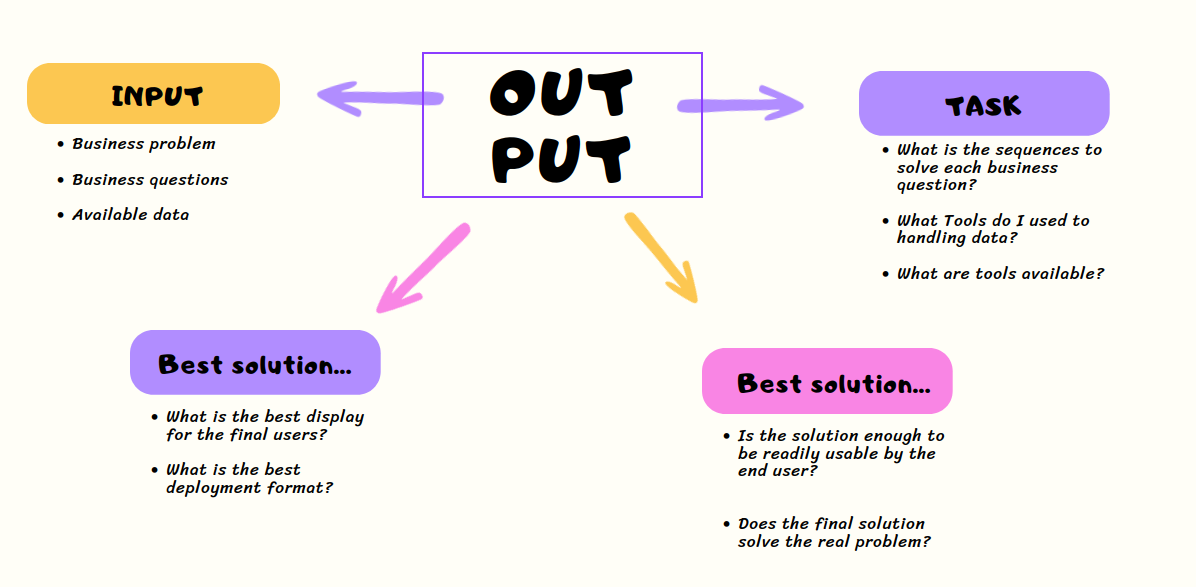

In [4]:
from IPython.display       import Image
Image( 'IOT_Method_Solution.png', width=1000 )

# SOLUTION STRATEGY


### INPUT

   * Business problem: churn rate identification.
   * Business questions: described in the preceding section
   * Available data: dataset with information from sales transactions.
        
        
### OUTPUT

   * An API to classify clients transactions.
   * A dashboard with reporting information about the following business questions:

   * What is the precision and accuracy of the model?
   
   * What is the expected revenue for the cases where the model succeed in detecting churn customers?
   
   * What is the expected loss by the company for the cases where the model not be implement?
   
   * What is the expected on the investiments for retention churn customers identify from the model that received dicount coupons?
    

### TASKs
Create an API to classify clients transactions.

   * Create a machine learning classification model
   * Create an API to respond to clients requests
   * Host API on a cloud service

# PROJECT SOLUTION CYCLE

In [5]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

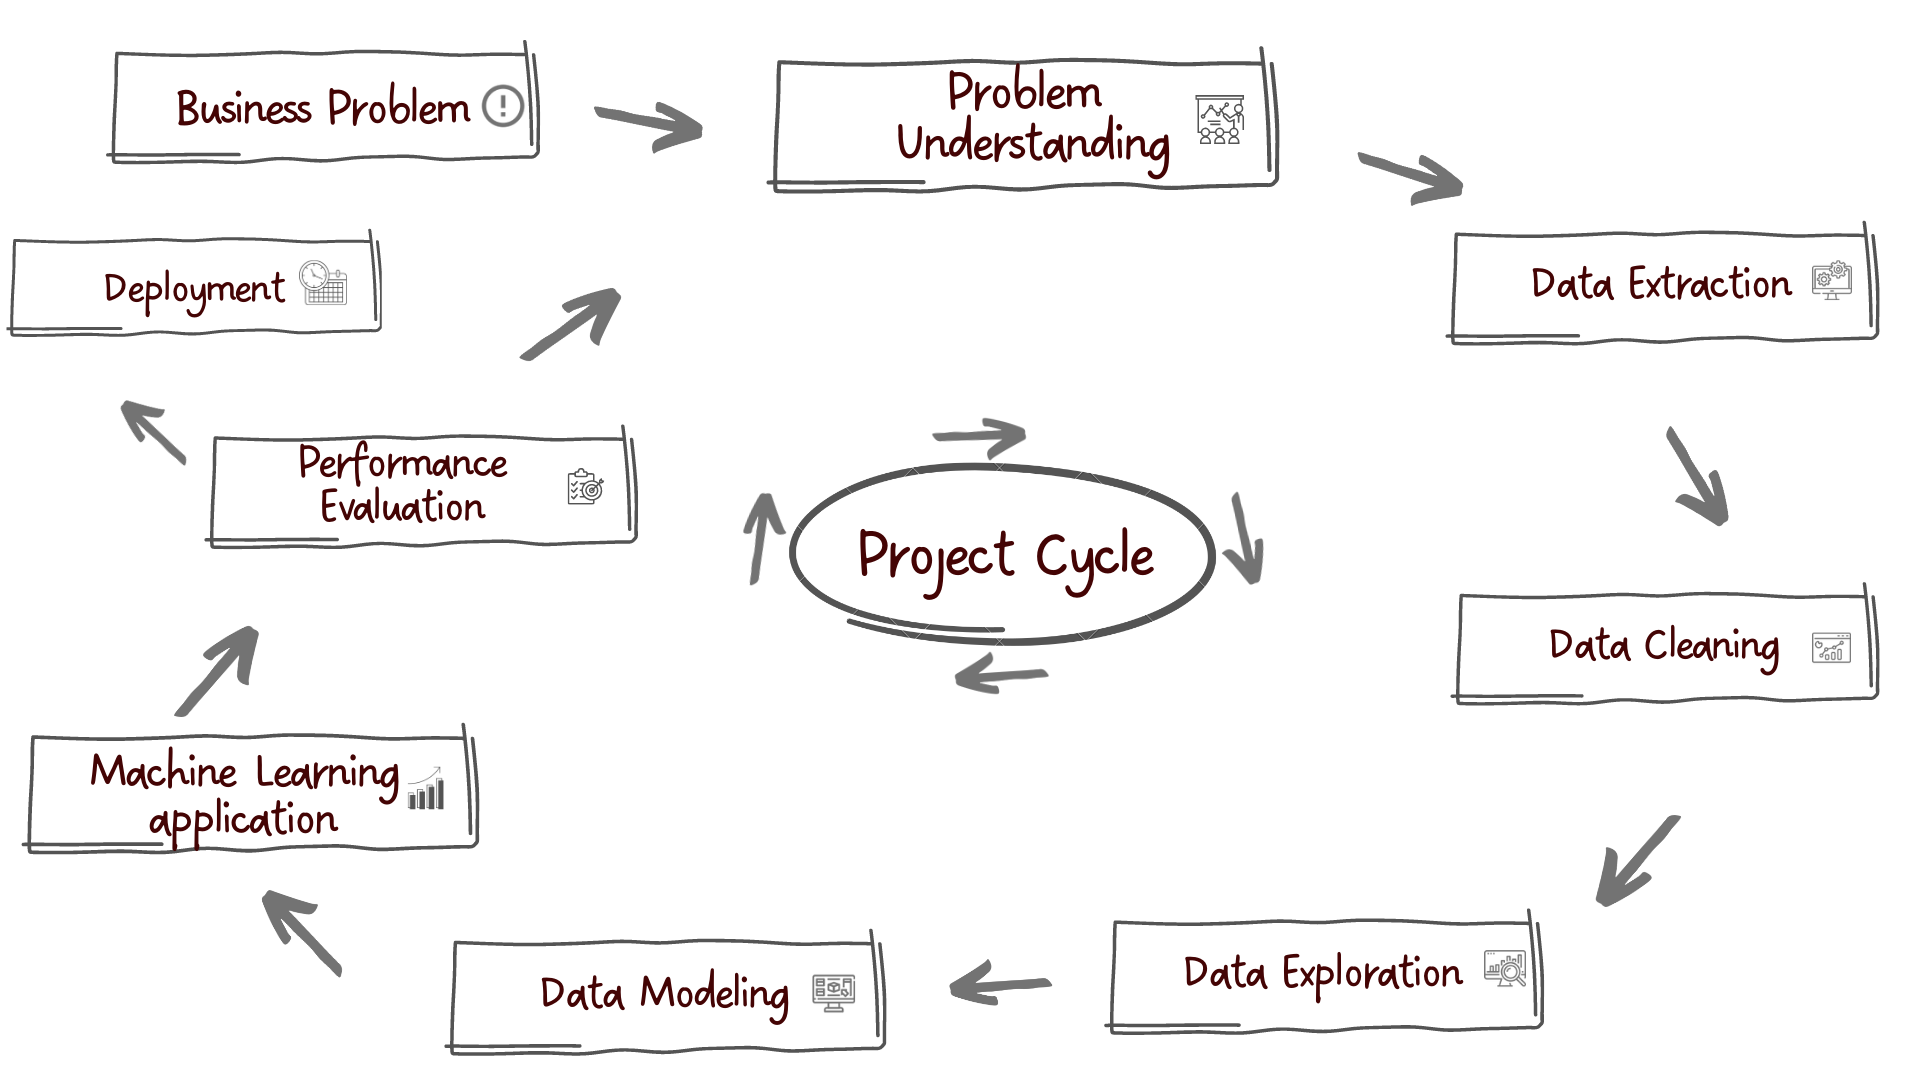

In [6]:
Image( 'Project_Cicles.png', width=1000 )

# HYPOTHESIS MIND MAP

In [7]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

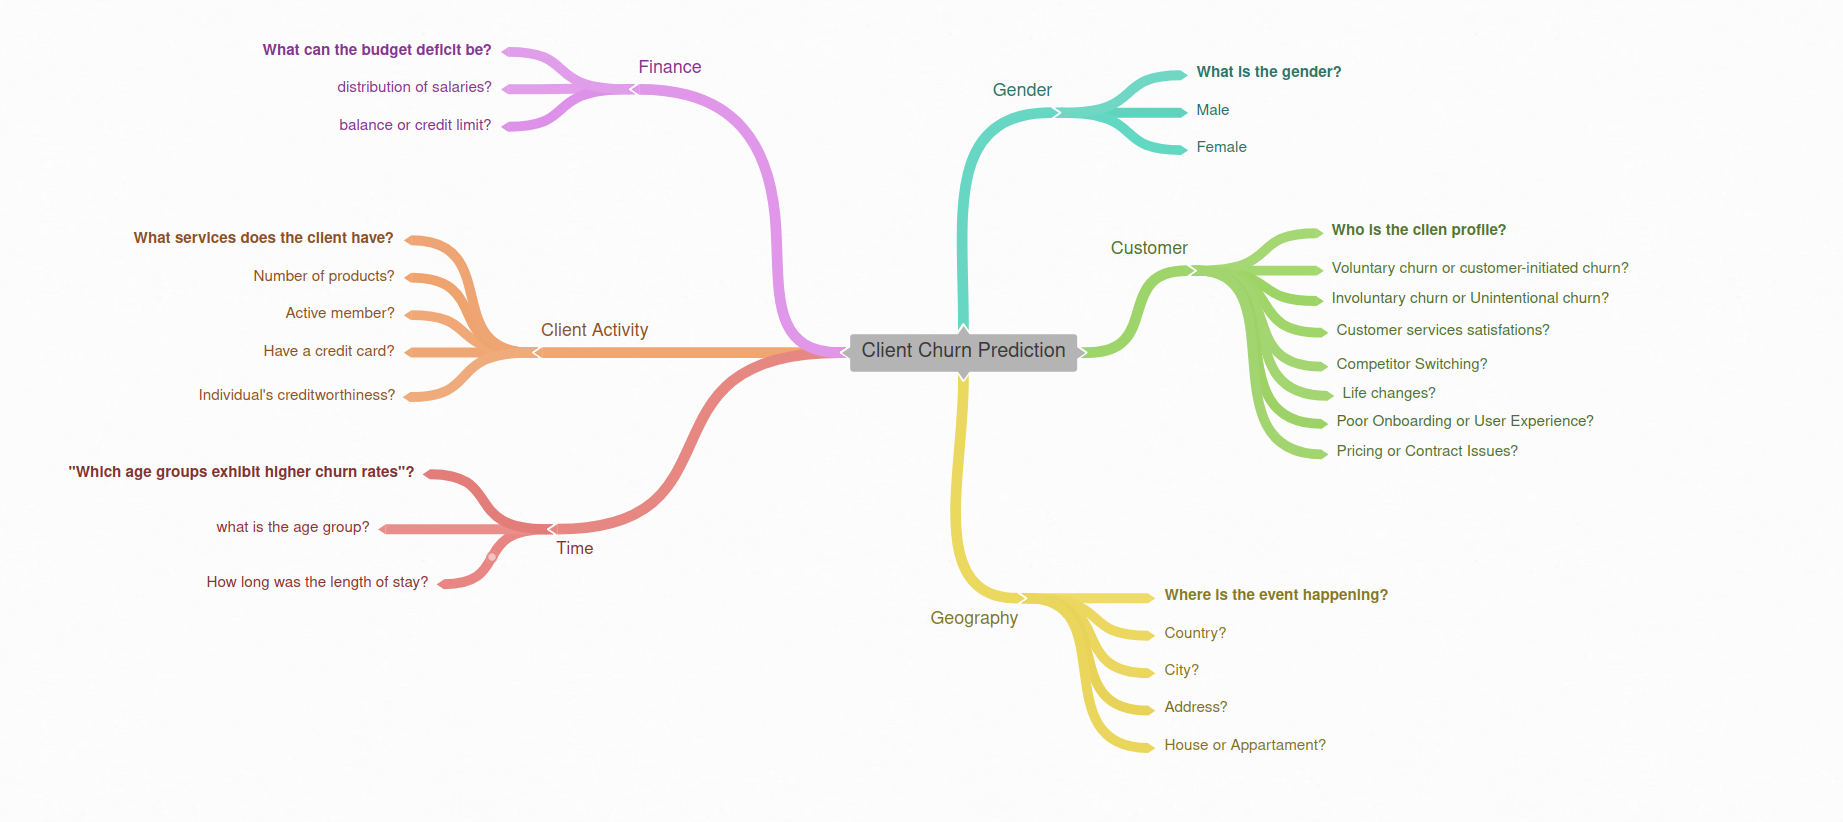

In [8]:
from IPython.display       import Image
Image( 'Hypothesis_Map.png', width=1000 )

# 0.0 Imports

In [91]:
# data manipulation
import pandas  as  pd
import numpy   as  np

# EDA
import seaborn as  sns
import math

# utilities
import inflection
from IPython.core.display import HTML
from IPython.display      import Image

# 
from scipy import stats

# Helper Function

In [133]:
# +++++++++
# Graphic
# +++++++++
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

# ++++++++++++++++
# Rename Columns
# ++++++++++++++++
def rename_columns(df1):
   
    # current columns name
    cols_old = df1.columns
    
    # apply snakecase to columns names
    snakecase = lambda x: inflection.underscore(x)
    cols_news = list(map(snakecase, cols_old))
    
    # rename columns
    df1.columns = cols_news
    
    return df1   

# ++++++++++++
# Data Types
# ++++++++++++
def check_dataframe( dataframe, sample_size = 3 ):
    '''
    Print number of NAs, percentage of NA to the given column,
    number of unique values, data types, dataframe shape and 
    return a random sample of dataframe'''
    
    # create dictionary with descriptive information
    dict_data = {'Num NAs':     dataframe.isna().sum(),
                 'Percent NAs': dataframe.isna().mean(),
                 'Num unique':  dataframe.nunique(),
                 'Data Type':   dataframe.dtypes }
  
    # print descriptive data
    print( pd.DataFrame( dict_data ), '\n' )
    # print dataframe shape
    print( f'Dataframe shape is {dataframe.shape}', '\n' )  
    
    
    return dataframe.sample( sample_size )

# ++++++++++++
# Cramer_V
# ++++++++++++
def cramer_v( x, y ):
    # calculate confusion matrix (cm), contingency table
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    # calculate chi2
    chi2 = stats.chi2_contingency( cm )[0]
    # chi2 correction
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    # k correction
    kcorr = k - (k-1)**2/(n-1)
    # r correction
    rcorr = r - (r-1)**2/(n-1)
    
    # return Cramer V
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/ehgeraldo/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1.0 Loading Data

In [11]:
pwd

'/home/ehgeraldo/repos/Churn_Prediction/images'

In [12]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Churn_Prediction/data/churn.csv', low_memory=False)

In [13]:
df_raw.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4          5    15737888  Mitchell          850     Spain  Female   43       2  125510.82              1          1               1         79084.10       0

## Data Description

In [14]:
df1 = df_raw.copy()

## Data dimensions

In [15]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 10000
Number of Columns: 14


## Rename Columns

In [16]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
# check columns rename

rename_columns(df1).head()

row_number  customer_id   surname  credit_score geography  gender  age  tenure    balance  num_of_products  has_cr_card  is_active_member  estimated_salary  exited
0           1     15634602  Hargrave           619    France  Female   42       2       0.00                1            1                 1         101348.88       1
1           2     15647311      Hill           608     Spain  Female   41       1   83807.86                1            0                 1         112542.58       0
2           3     15619304      Onio           502    France  Female   42       8  159660.80                3            1                 0         113931.57       1
3           4     15701354      Boni           699    France  Female   39       1       0.00                2            0                 0          93826.63       0
4           5     15737888  Mitchell           850     Spain  Female   43       2  125510.82                1            1                 1          79084.10       0

## Data types

In [18]:
check_dataframe( df1 )

                  Num NAs  Percent NAs  Num unique Data Type
row_number              0          0.0       10000     int64
customer_id             0          0.0       10000     int64
surname                 0          0.0        2932    object
credit_score            0          0.0         460     int64
geography               0          0.0           3    object
gender                  0          0.0           2    object
age                     0          0.0          70     int64
tenure                  0          0.0          11     int64
balance                 0          0.0        6382   float64
num_of_products         0          0.0           4     int64
has_cr_card             0          0.0           2     int64
is_active_member        0          0.0           2     int64
estimated_salary        0          0.0        9999   float64
exited                  0          0.0           2     int64 

Dataframe shape is (10000, 14) 



row_number  customer_id surname  credit_score geography  gender  age  tenure   balance  num_of_products  has_cr_card  is_active_member  estimated_salary  exited
8062        8063     15812607  Wilson           663   Germany  Female   46       6  95439.40                1            1                 1          21038.58       1
2909        2910     15606274    Lori           594   Germany    Male   38       6  63176.44                2            1                 1          14466.08       0
6765        6766     15689955  Arcuri           461    France  Female   40       7      0.00                2            1                 0         176547.80       0

## Data Changes

In [19]:
# change has_cr_card => 0 or 1 to no or yes
df1['has_cr_card'] = df1['has_cr_card'].apply( lambda x: 'yes' if x == 1 else 'no')

# is_active_member  => 0 or 1 to no or yes
df1['is_active_member'] = df1['is_active_member'].apply(lambda x: 'yes' if x == 1 else 'no')

# exited  => 0 or 1 to no or yes
df1['exited'] = df1['exited'].apply(lambda x: 'yes' if x == 1 else 'no')

df1.sample(3)

row_number  customer_id    surname  credit_score geography  gender  age  tenure    balance  num_of_products has_cr_card is_active_member  estimated_salary exited
5818        5819     15667971   Shepherd           592   Germany  Female   34       6  102143.93                2         yes              yes         102628.98     no
9607        9608     15806918    Ireland           674    France    Male   28       5       0.00                1         yes              yes         151925.25     no
2497        2498     15748123  Chienezie           613    France    Male   20       3       0.00                2         yes              yes         149613.77     no

## Descriptive Statistical

In [20]:
# Numerical attributes selected
num_attributes = df1.select_dtypes( include=['int64','float64'])

## Numerical Attributes

In [21]:
# Central Tendency - mean, median  
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
    
# Dispersion - standard deviation (std), min, max, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
    
# Dispersion - values' Range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
    
# Dispersion - skew and kurtosis
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
    
# Concatenate all data frames
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes          min          max      range          mean        median           std      skew  kurtosis
0        row_number         1.00     10000.00    9999.00  5.000500e+03  5.000500e+03   2886.751332  0.000000 -1.200000
1       customer_id  15565701.00  15815690.00  249989.00  1.569094e+07  1.569074e+07  71932.589224  0.001149 -1.196113
2      credit_score       350.00       850.00     500.00  6.505288e+02  6.520000e+02     96.648466 -0.071607 -0.425726
3               age        18.00        92.00      74.00  3.892180e+01  3.700000e+01     10.487282  1.011320  1.395347
4            tenure         0.00        10.00      10.00  5.012800e+00  5.000000e+00      2.892030  0.010991 -1.165225
5           balance         0.00    250898.09  250898.09  7.648589e+04  9.719854e+04  62394.285254 -0.141109 -1.489412
6   num_of_products         1.00         4.00       3.00  1.530200e+00  1.000000e+00      0.581625  0.745568  0.582981
7  estimated_salary        11.58    199992.48  199980.90  1.000902e+05  1.001939e+05  57507.617221  0.002085 -1.181518

array([[<AxesSubplot:title={'center':'row_number'}>,
        <AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'credit_score'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'num_of_products'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:>]], dtype=object)

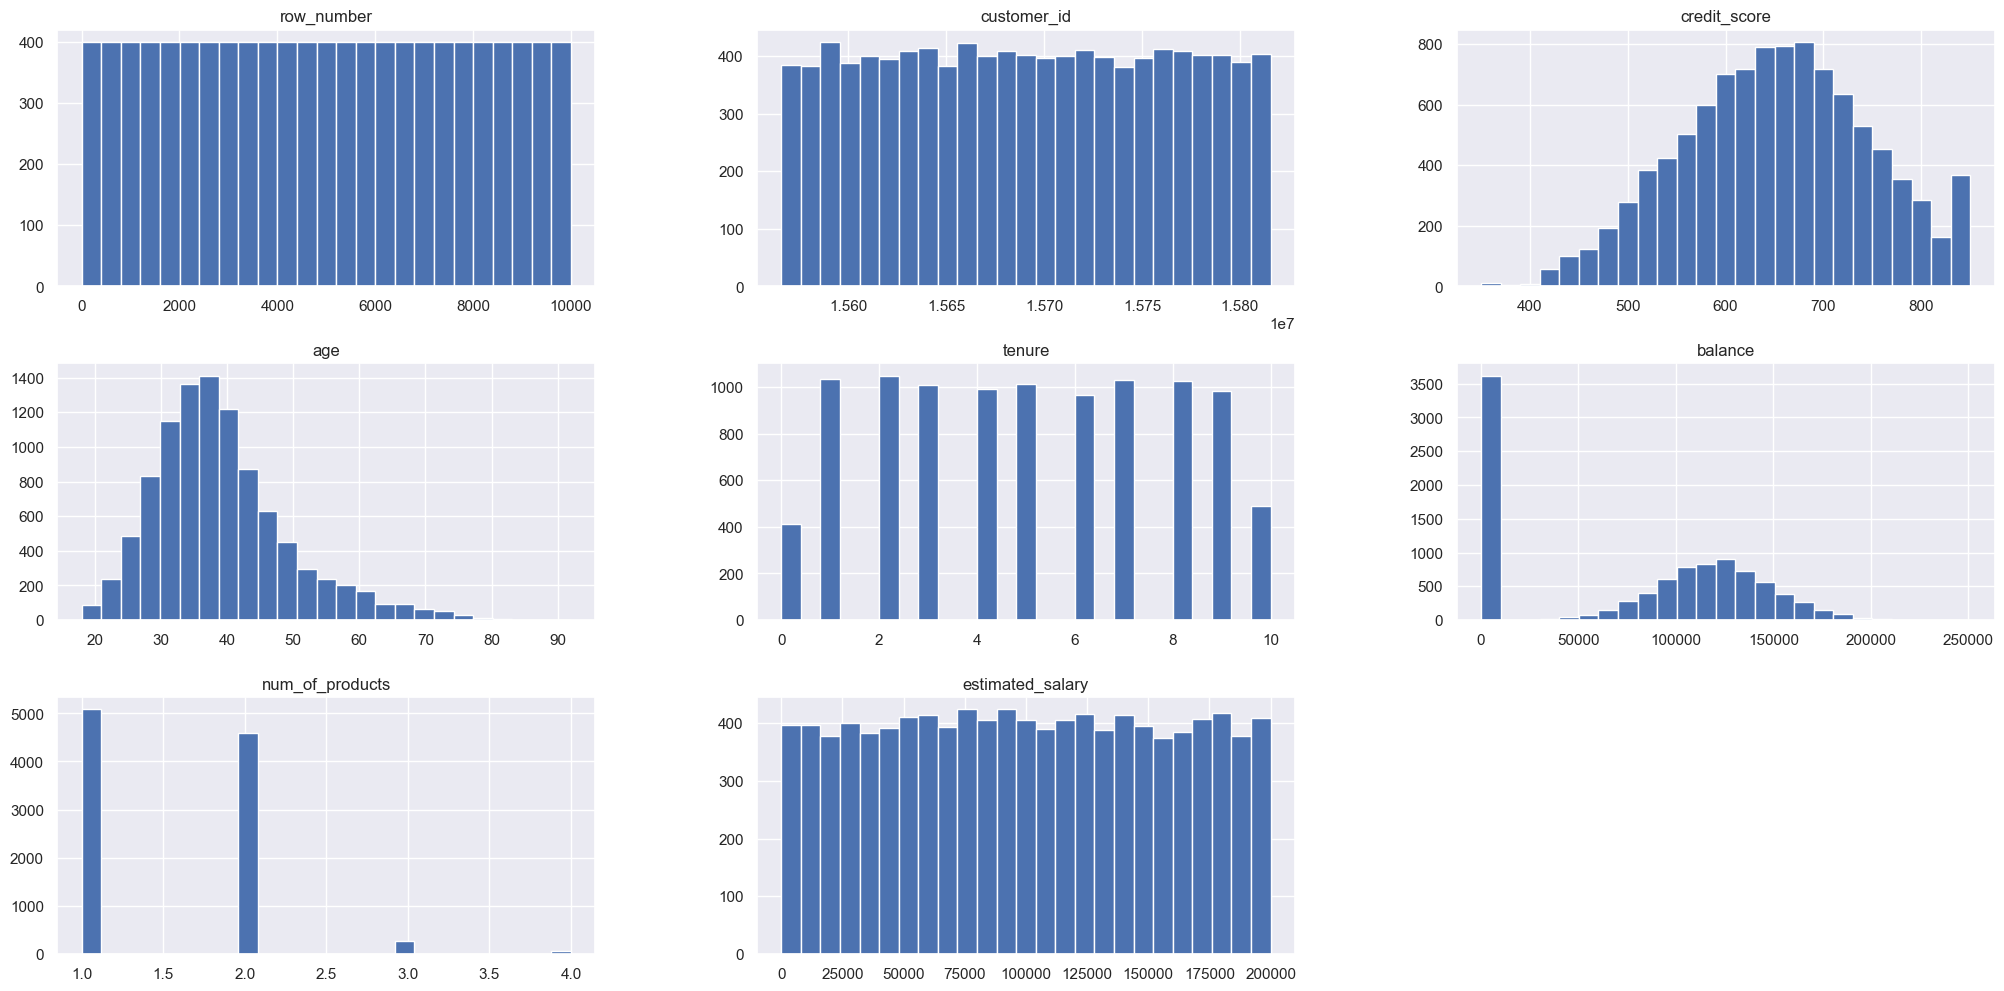

In [22]:
num_attributes.hist(bins=25)

**Observations:**

- The average credit for consumption is 652,00 euros.
- The average age of the bank's clients is 37 years.
- The average number of months that customers remained active is 5 months.
- The average balance of the customers' account is 76.485,00 euros.
- The average number of products purchased by the bank's clients is 1.53.
- The **minimum estimated salary of some people is 11.58 euros. This result is suspect compared to the average estimated salary of 100.090,20 euros.**
  
  https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Minimum_wage_statistics

## Categorical Attributes

In [23]:
# Categorical attributes selected
cat_attributes = df1.select_dtypes( exclude=['int64','float64'] )

In [24]:
# Check unique variables
cat_attributes.apply( lambda x: x.unique().shape[0] )

surname             2932
geography              3
gender                 2
has_cr_card            2
is_active_member       2
exited                 2
dtype: int64

In [25]:
# geography percentage distribution

percentage_geo = cat_attributes['geography'].value_counts(normalize=True) * 100
percentage_geo

France     50.14
Germany    25.09
Spain      24.77
Name: geography, dtype: float64

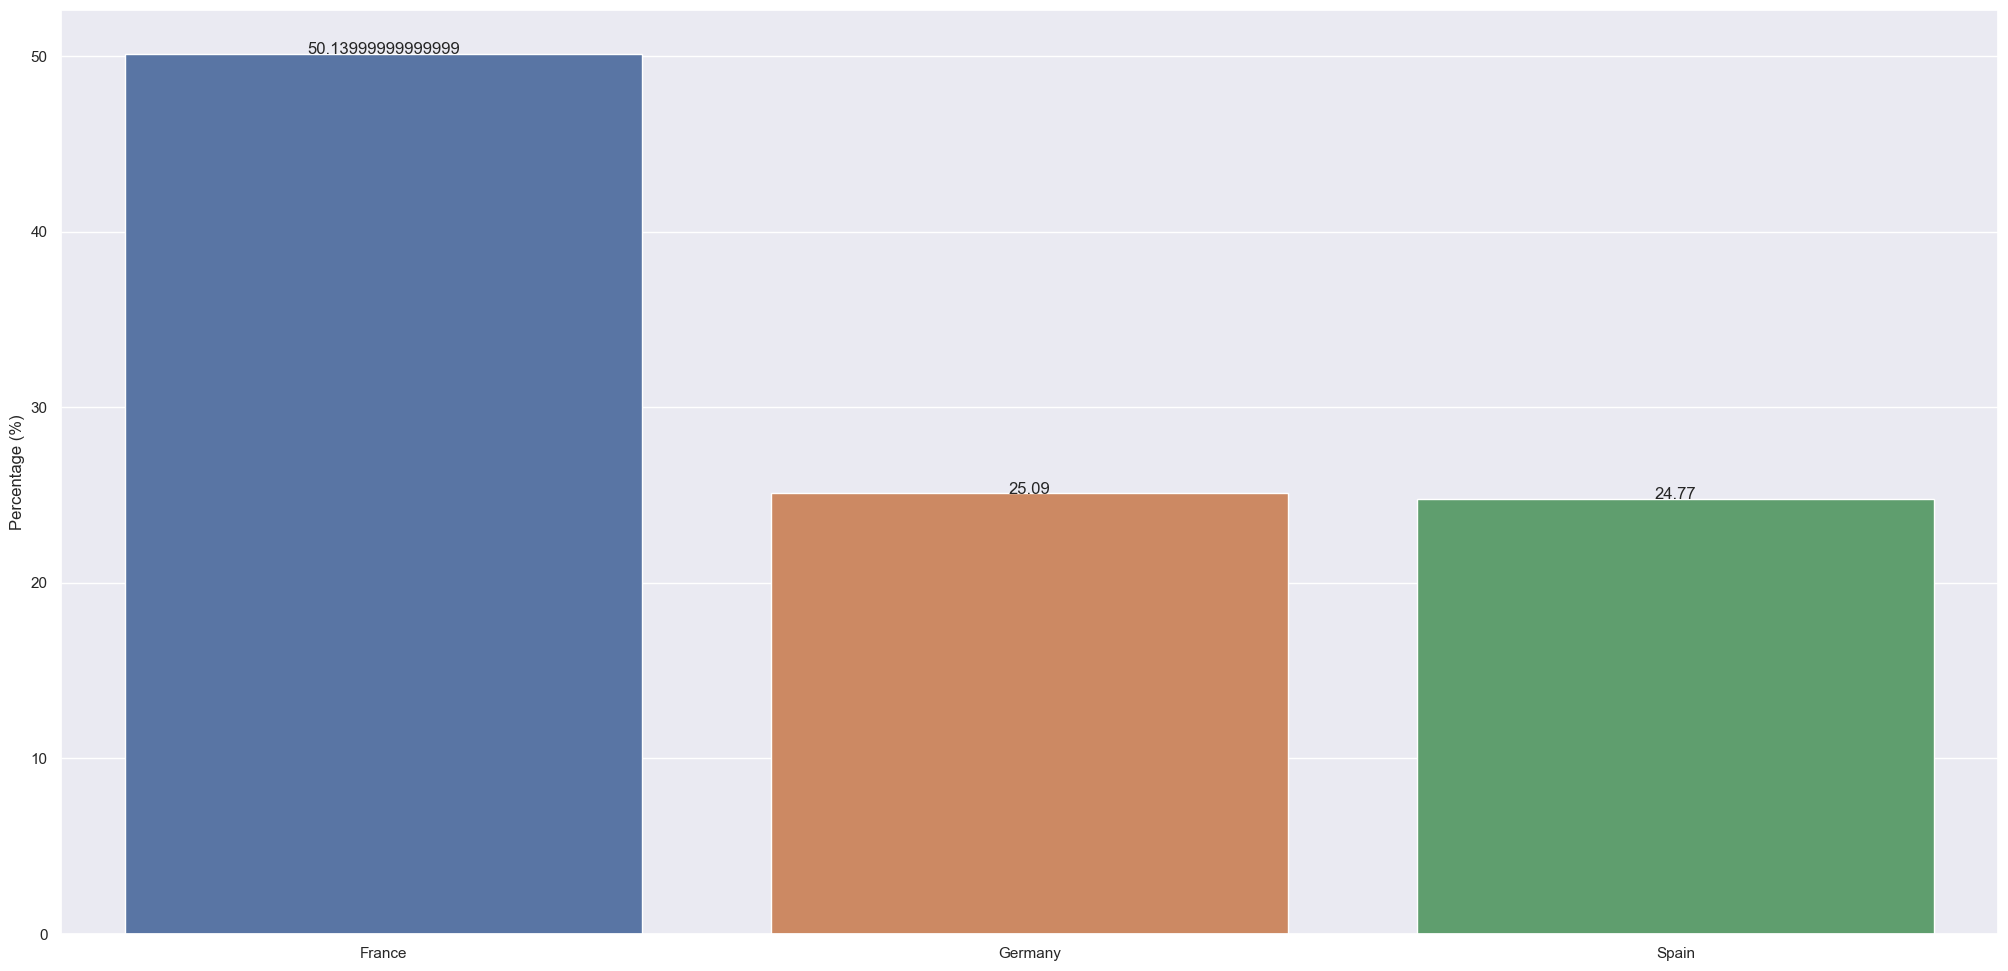

In [26]:
# geography percentage representation

gr = sns.barplot(x=percentage_geo.index, y=percentage_geo)
plt.ylabel('Percentage (%)')
#plt.title('Geography percentage')

# Adjust erros advices
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
# Display the plot
plt.show('png')

**Observations:**

- **Nearly half of the customer base originates from France.**
- **The remaining 50% comes from Germany, while approximately 25% hails from Spain.**

In [27]:
percentage_gender = cat_attributes['gender'].value_counts(normalize=True) * 100
percentage_gender

Male      54.57
Female    45.43
Name: gender, dtype: float64

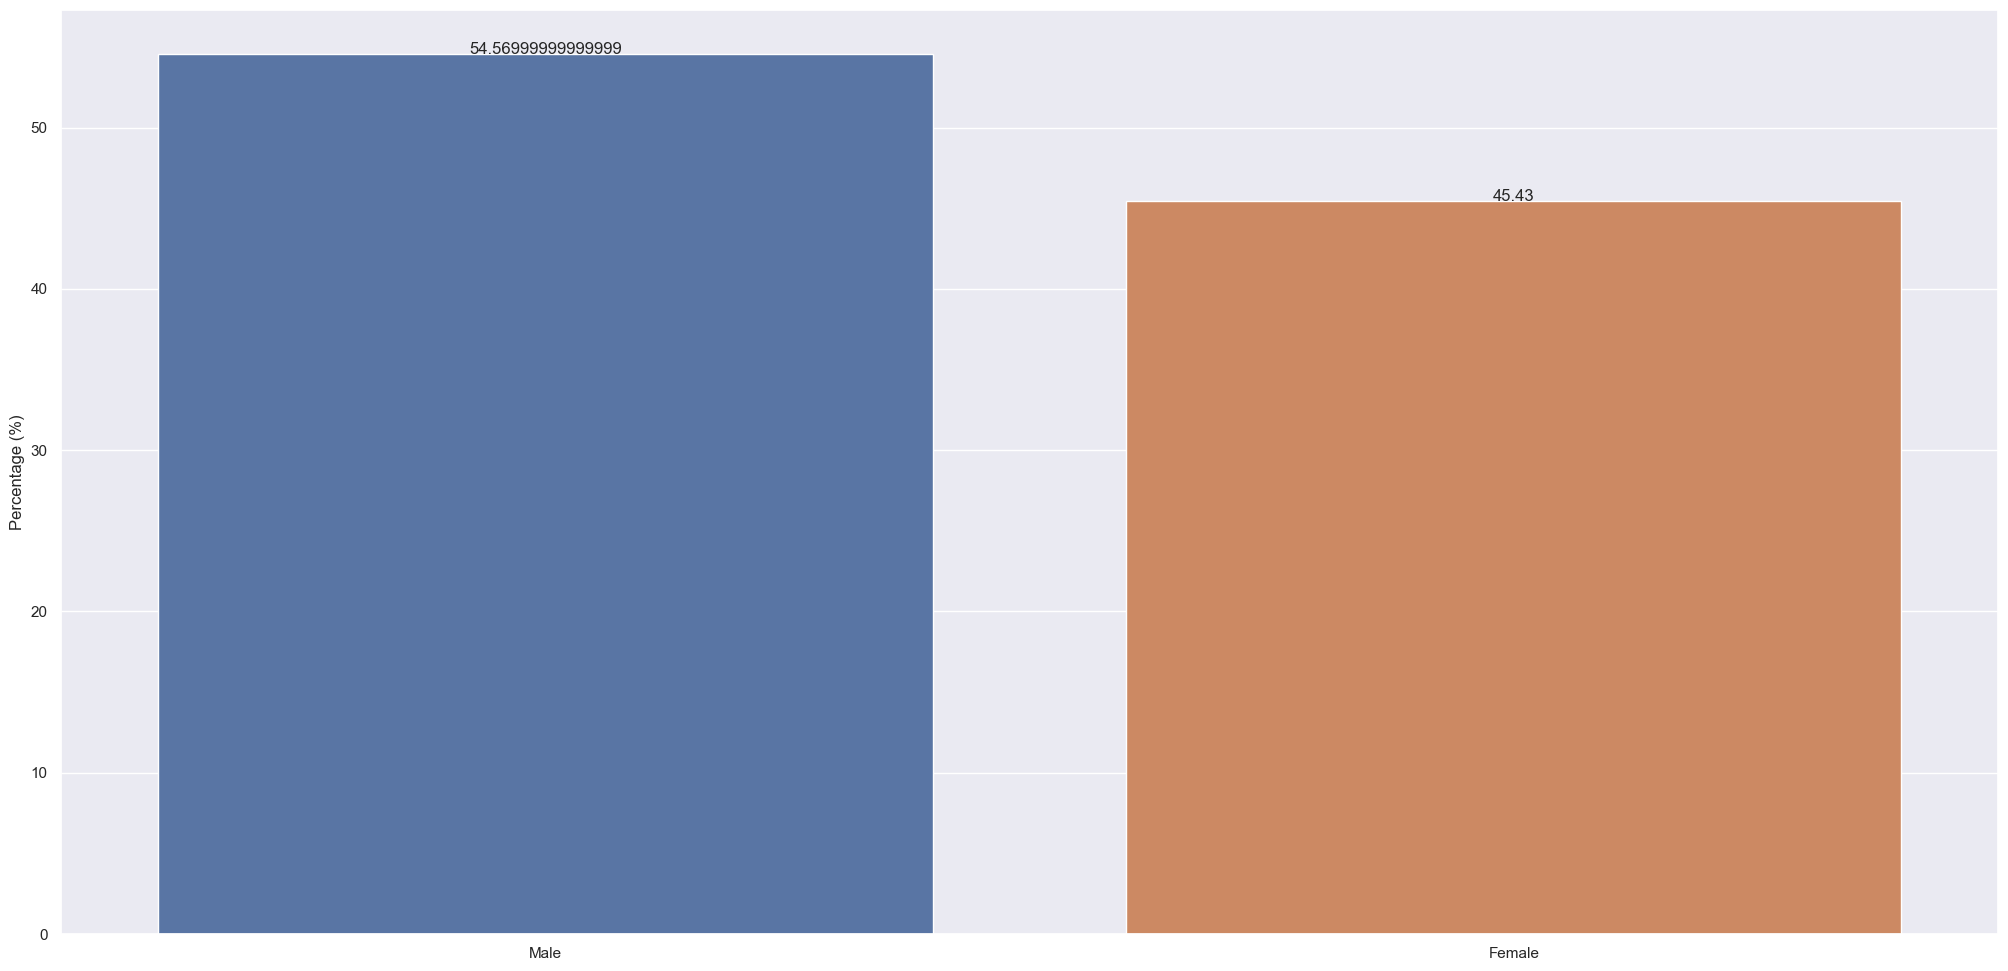

In [28]:
# gender percentage representation

gr = sns.barplot(x=percentage_gender.index, y=percentage_gender)
plt.ylabel('Percentage (%)')
#plt.title('Gender percentage')

# Adjust erros advices
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
# Display the plot
plt.show('png')

**Observations:**

- **More than 50% of the customers distribution are men**
- **Less than 45% of the customers are women**

In [29]:
# Group geography, gender and balance
aux1 = df1[['geography','gender','balance']].groupby(['geography','gender']).sum().reset_index()

# Group geography, gender, estimated_salary
aux2 = df1[['geography','gender','estimated_salary']].groupby(['geography','gender']).sum().reset_index()

# Group geography, gender, num_of_products
aux3 = df1[['geography','gender','num_of_products']].groupby(['geography','gender']).sum().reset_index()

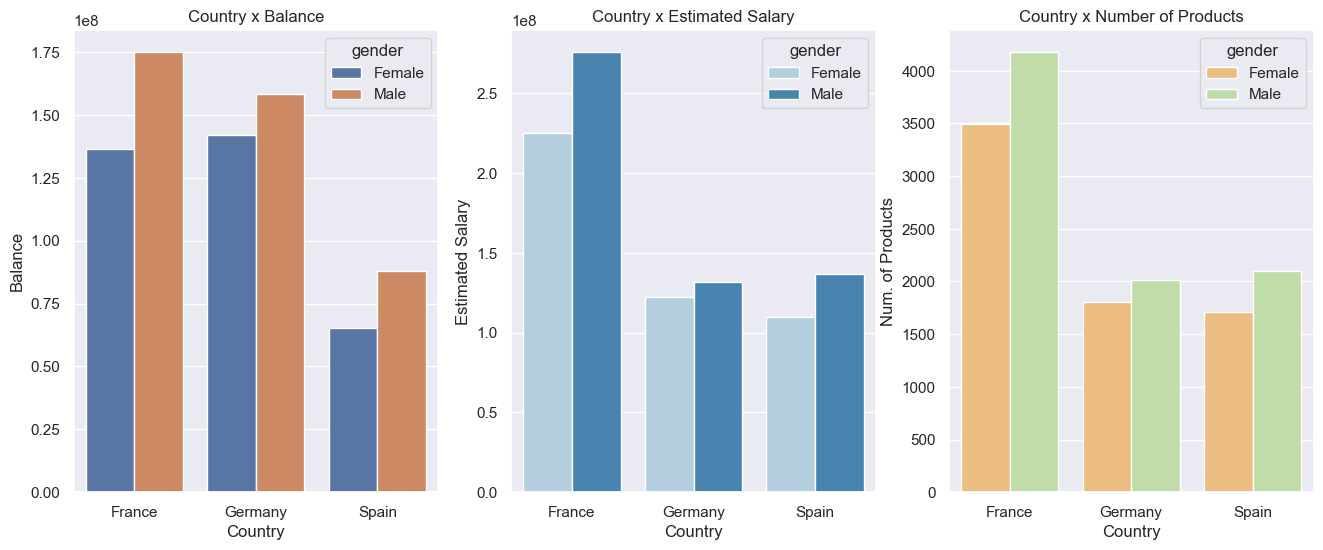

In [30]:
# country segmentation charts by gender influenced by balance sheet, 

fig,gr = plt.subplots()

gr.figure.set_size_inches(16,6)

plt.subplot(1,3,1)
sns.barplot(x = 'geography', hue= 'gender', y = 'balance' , data=aux1)

# Title and legends
plt.title('Country x Balance')
plt.xlabel('Country')
plt.ylabel('Balance')

# country segmentation charts by gender influenced bysalary estimate, 
plt.subplot(1,3,2)
sns.barplot(x = 'geography', hue= 'gender', y = 'estimated_salary',  palette = 'Blues', data=aux2)

# Title and legends
plt.title('Country x Estimated Salary')
plt.xlabel('Country')
plt.ylabel('Estimated Salary')


# country segmentation charts by gender influenced bynumber of products
plt.subplot(1,3,3)
sns.barplot(x = 'geography', hue= 'gender', y = 'num_of_products', palette = 'Spectral' ,data=aux3)

# Title and legends
plt.title('Country x Number of Products')
plt.xlabel('Country')
plt.ylabel('Num. of Products')


# Display the plot
plt.show('png')

**Observations:**

- The estimated salaries for men are higher than those for women in all three countries analyzed.
- The male gender balance is higher than the female gender balance in France and Germany countries analyzed.
- The male gender has a greater number of banking products compared to the female gender, in the France the num. of products are two times more than Germany and Spain.

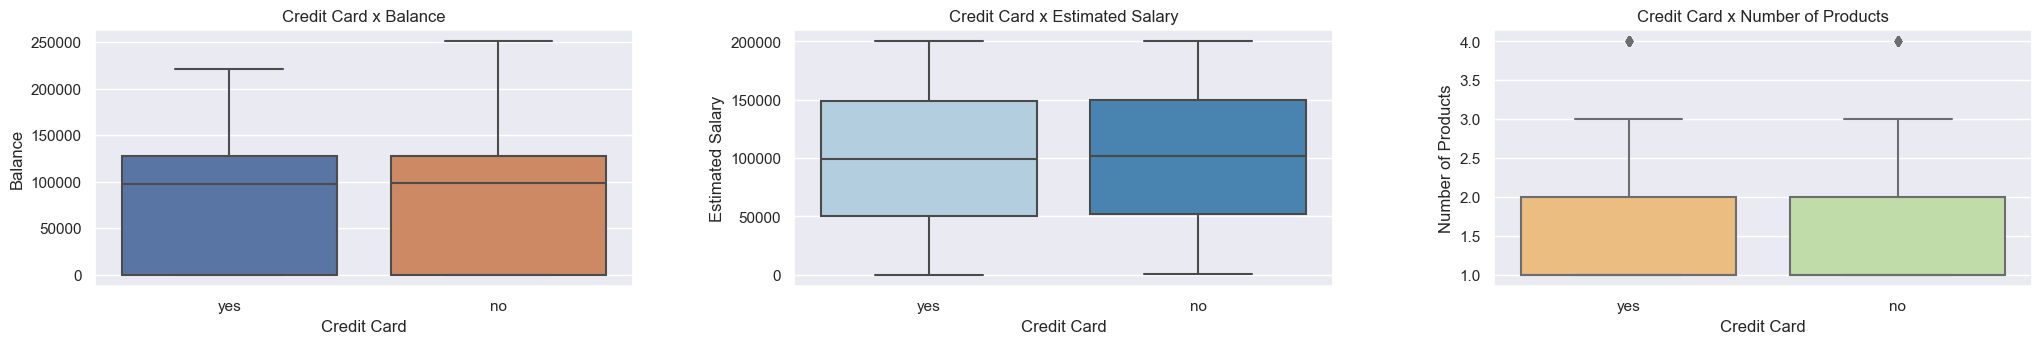

In [31]:
# credit card segmentation charts by balance,
sns.set(style="darkgrid")

plt.subplot(3, 3, 1)
sns.boxplot(x=df1['has_cr_card'], y=df1['balance'])
plt.title('Credit Card x Balance')
plt.xlabel('Credit Card')
plt.ylabel('Balance')


# credit card segmentation charts by estimated salary
plt.subplot(3, 3, 2)
sns.boxplot(x=df1['has_cr_card'], y=df1['estimated_salary'], palette = 'Blues')
plt.title('Credit Card x Estimated Salary')
plt.xlabel('Credit Card')
plt.ylabel('Estimated Salary')

# credit card segmentation charts by num of products
plt.subplot(3, 3, 3)
sns.boxplot(x=df1['has_cr_card'], y=df1['num_of_products'], palette ='Spectral')
plt.title('Credit Card x Number of Products')
plt.xlabel('Credit Card')
plt.ylabel('Number of Products')

# Adjust erros advices
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Display the plot
plt.show('png')

**Observations:**

- The balance for credit card customers exceeds $100,000.

- The uppermost salary estimate range reaches $150,000.

- The majority of credit card customers have between 1 and 2 products linked to their bank account.

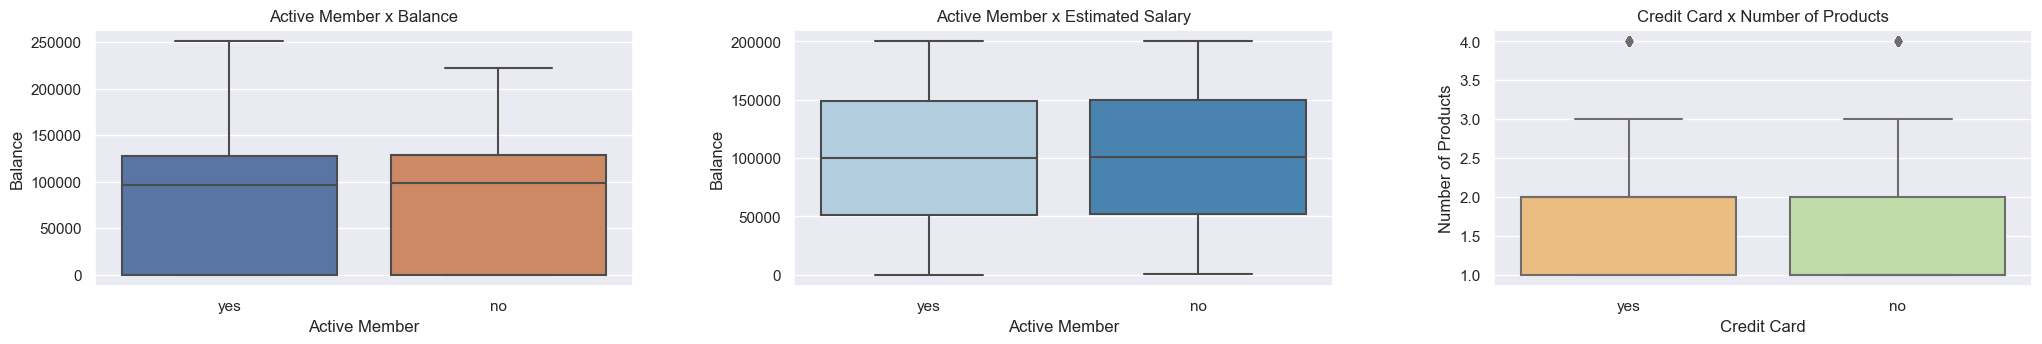

In [32]:
#  active member segmentation charts by balance, 

plt.subplot(3, 3, 1)
sns.boxplot(x=df1['is_active_member'], y=df1['balance'])
plt.title('Active Member x Balance')
plt.xlabel('Active Member')
plt.ylabel('Balance')


# credit card segmentation charts by estimated salary
plt.subplot(3, 3, 2)
sns.boxplot(x=df1['is_active_member'], y=df1['estimated_salary'], palette = 'Blues')
plt.title('Active Member x Estimated Salary')
plt.xlabel('Active Member')
plt.ylabel('Balance')

# credit card segmentation charts by num of products
plt.subplot(3, 3, 3)
sns.boxplot(x=df1['is_active_member'], y=df1['num_of_products'], palette = 'Spectral')
plt.title('Credit Card x Number of Products')
plt.xlabel('Credit Card')
plt.ylabel('Number of Products')

# Adjust erros advices
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Display the plot
plt.show('png')

**Observations:**

- More than half of the active members have a balance above $100,000.

# 2.0 Features Engineering

In [33]:
df2 = df1.copy()

In [34]:
# Age Group
df2['age_group'] = df2['age'].apply(lambda x: 'young' if x < 20 else 'adult' if 20 <= x < 60 else 'old')

# Has Credit Card / Is Active Member
df2['has_cr_card_active_member'] = df2.apply(lambda x: 'yes' if (x['has_cr_card'] == 'yes') and (x['is_active_member'] == 'yes') 
                                   else 'no' if (x['has_cr_card'] == 'no') and (x['is_active_member'] == 'no') 
                                   else 'only credit card' if (x['has_cr_card'] == 'yes') and (x['is_active_member'] == 'no')
                                   else 'only active member', axis=1)
# Tenure / Has Credit Card
df2['tenure_has_cr_card'] = df2.apply(lambda x: 'yes' if (x['tenure'] > 0) and (x['has_cr_card'] == 'yes') 
                                      else 'no' if (x['tenure'] < 0) and (x['has_cr_card'] == 'no') 
                                      else 'only tenure' if (x['tenure'] > 0) and (x['has_cr_card'] == 'no') 
                                      else 'only credit card', axis=1)
# Tenure/Is Active Member
df2['tenure_is_active_member'] = df2.apply(lambda x: 'yes' if (x['tenure'] > 0) and (x['is_active_member'] == 'yes') 
                                          else 'no' if (x['tenure'] < 0) and (x['is_active_member'] == 'no') 
                                          else 'only tenure' if (x['tenure'] > 0) and (x['is_active_member'] == 'no') 
                                          else 'only active member', axis=1)

In [35]:
df2.head()

row_number  customer_id   surname  credit_score geography  gender  age  tenure    balance  num_of_products has_cr_card is_active_member  estimated_salary exited age_group has_cr_card_active_member tenure_has_cr_card tenure_is_active_member
0           1     15634602  Hargrave           619    France  Female   42       2       0.00                1         yes              yes         101348.88    yes     adult                       yes                yes                     yes
1           2     15647311      Hill           608     Spain  Female   41       1   83807.86                1          no              yes         112542.58     no     adult        only active member        only tenure                     yes
2           3     15619304      Onio           502    France  Female   42       8  159660.80                3         yes               no         113931.57    yes     adult          only credit card                yes             only tenure
3           4     15701354      Boni           699    France  Female   39       1       0.00                2          no               no          93826.63     no     adult                        no        only tenure             only tenure
4           5     15737888  Mitchell           850     Spain  Female   43       2  125510.82                1         yes              yes          79084.10     no     adult                       yes                yes                     yes

# 3.0 Filter

Considering a baseline:

- Minimal Salary in the France: 1.522,00 euros

- Minimal Salary in the Germany: 1.557,00 euros

- Minimal Salary in the Spain: 1.050,00 euros

**Reference:** https://ec.europa.eu/eurostat/en/web/products-datasets/-/EARN_MW_CUR

In [36]:
df3 = df2.copy()

In [37]:
df3.shape

(10000, 18)

In [38]:
# Change the Estimated salary references
df3 = df3[df3['estimated_salary'] > 6000]

In [39]:
# Drop surname feature - The surname of a customer has no impact on their decision to leave the bank.
df3 = df3.drop(['surname'], axis=1)

# 4.0 Exploratory Data Analysis (EDA) 

In [40]:
df4 = df3.copy()

In [41]:
df4.head(3)

row_number  customer_id  credit_score geography  gender  age  tenure    balance  num_of_products has_cr_card is_active_member  estimated_salary exited age_group has_cr_card_active_member tenure_has_cr_card tenure_is_active_member
0           1     15634602           619    France  Female   42       2       0.00                1         yes              yes         101348.88    yes     adult                       yes                yes                     yes
1           2     15647311           608     Spain  Female   41       1   83807.86                1          no              yes         112542.58     no     adult        only active member        only tenure                     yes
2           3     15619304           502    France  Female   42       8  159660.80                3         yes               no         113931.57    yes     adult          only credit card                yes             only tenure

## Univariate Analysis

In [42]:
# Target variable counts
df4['exited'].value_counts(normalize=True)

no     0.796161
yes    0.203839
Name: exited, dtype: float64

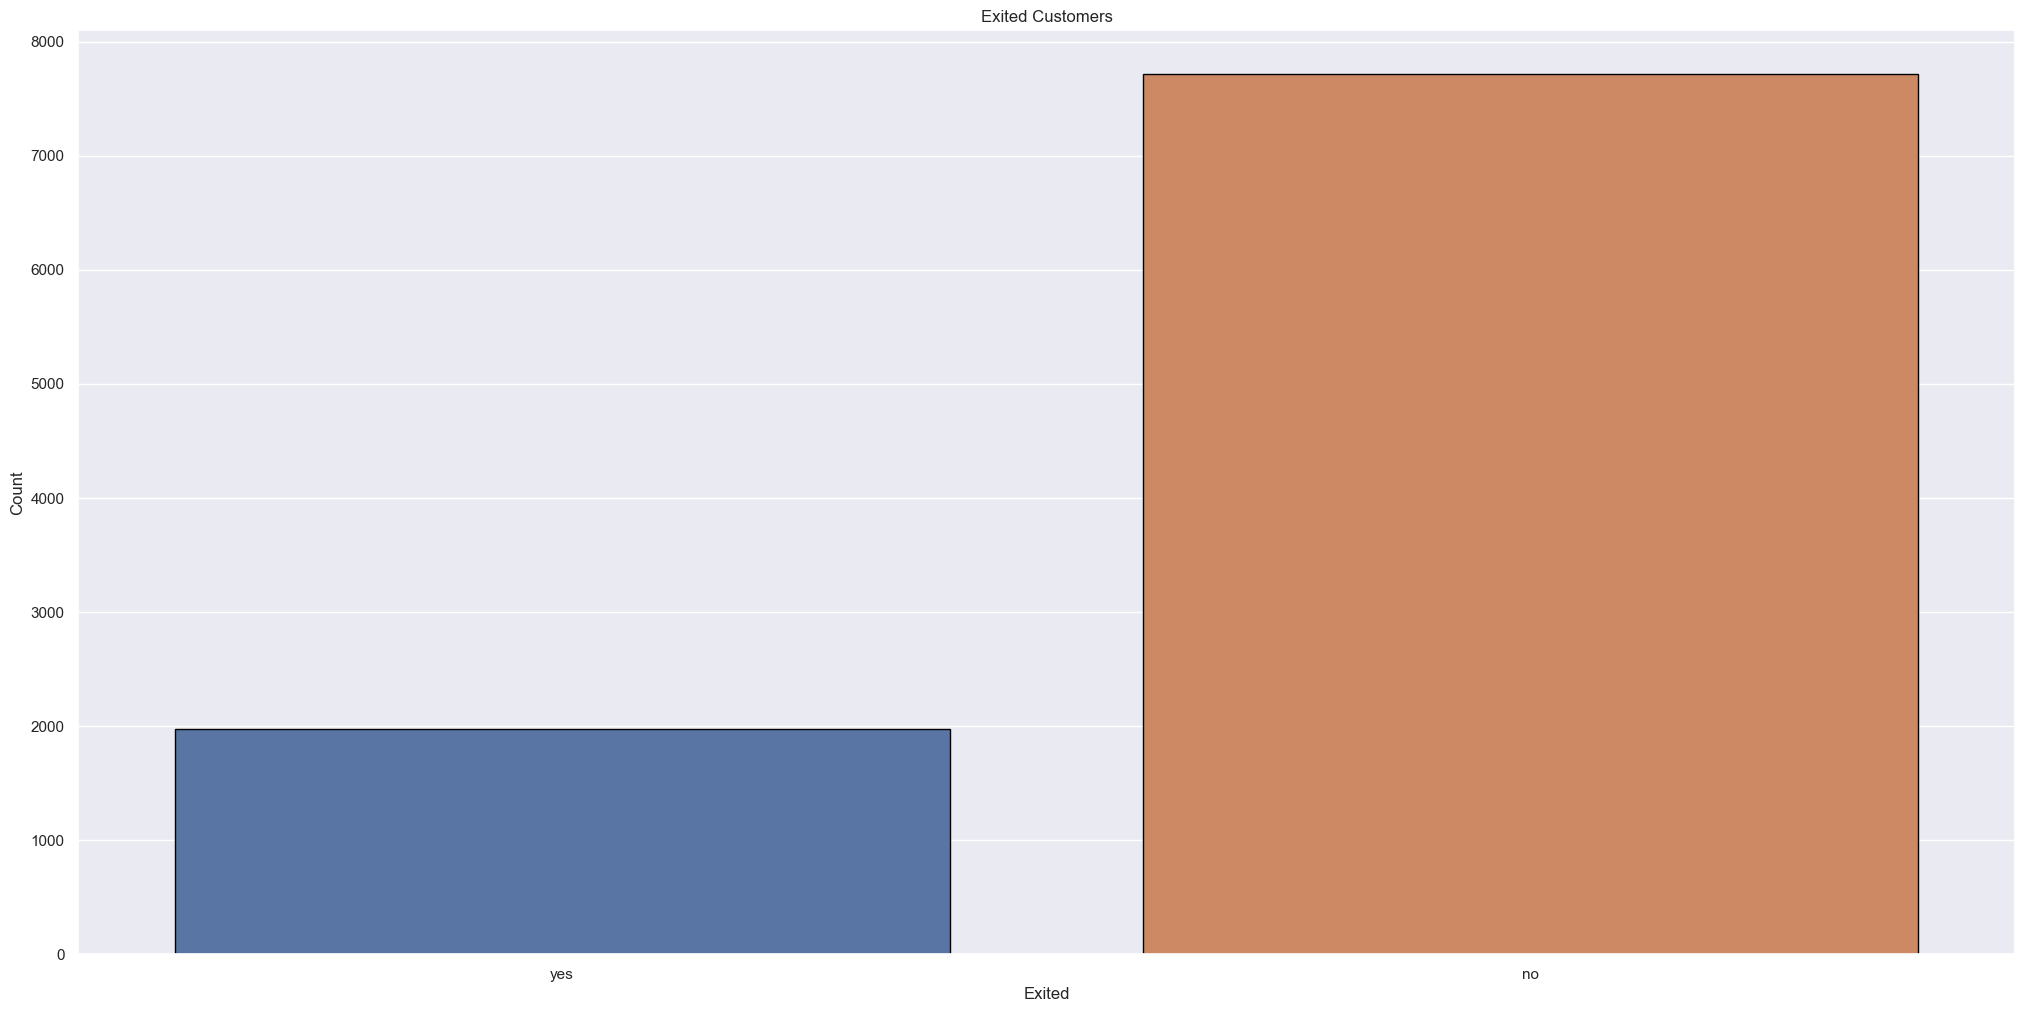

In [43]:
# Target variable
sns.countplot(x = df4['exited'], edgecolor = "black")
plt.title('Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')

# Display the plot
plt.show('png')

**Observations:**

In the exited variable noted, exited customers are 20% of the users.


- 20,38 % (yes)
- 79,62 % (no) 

**20% that is the current churn rate.**


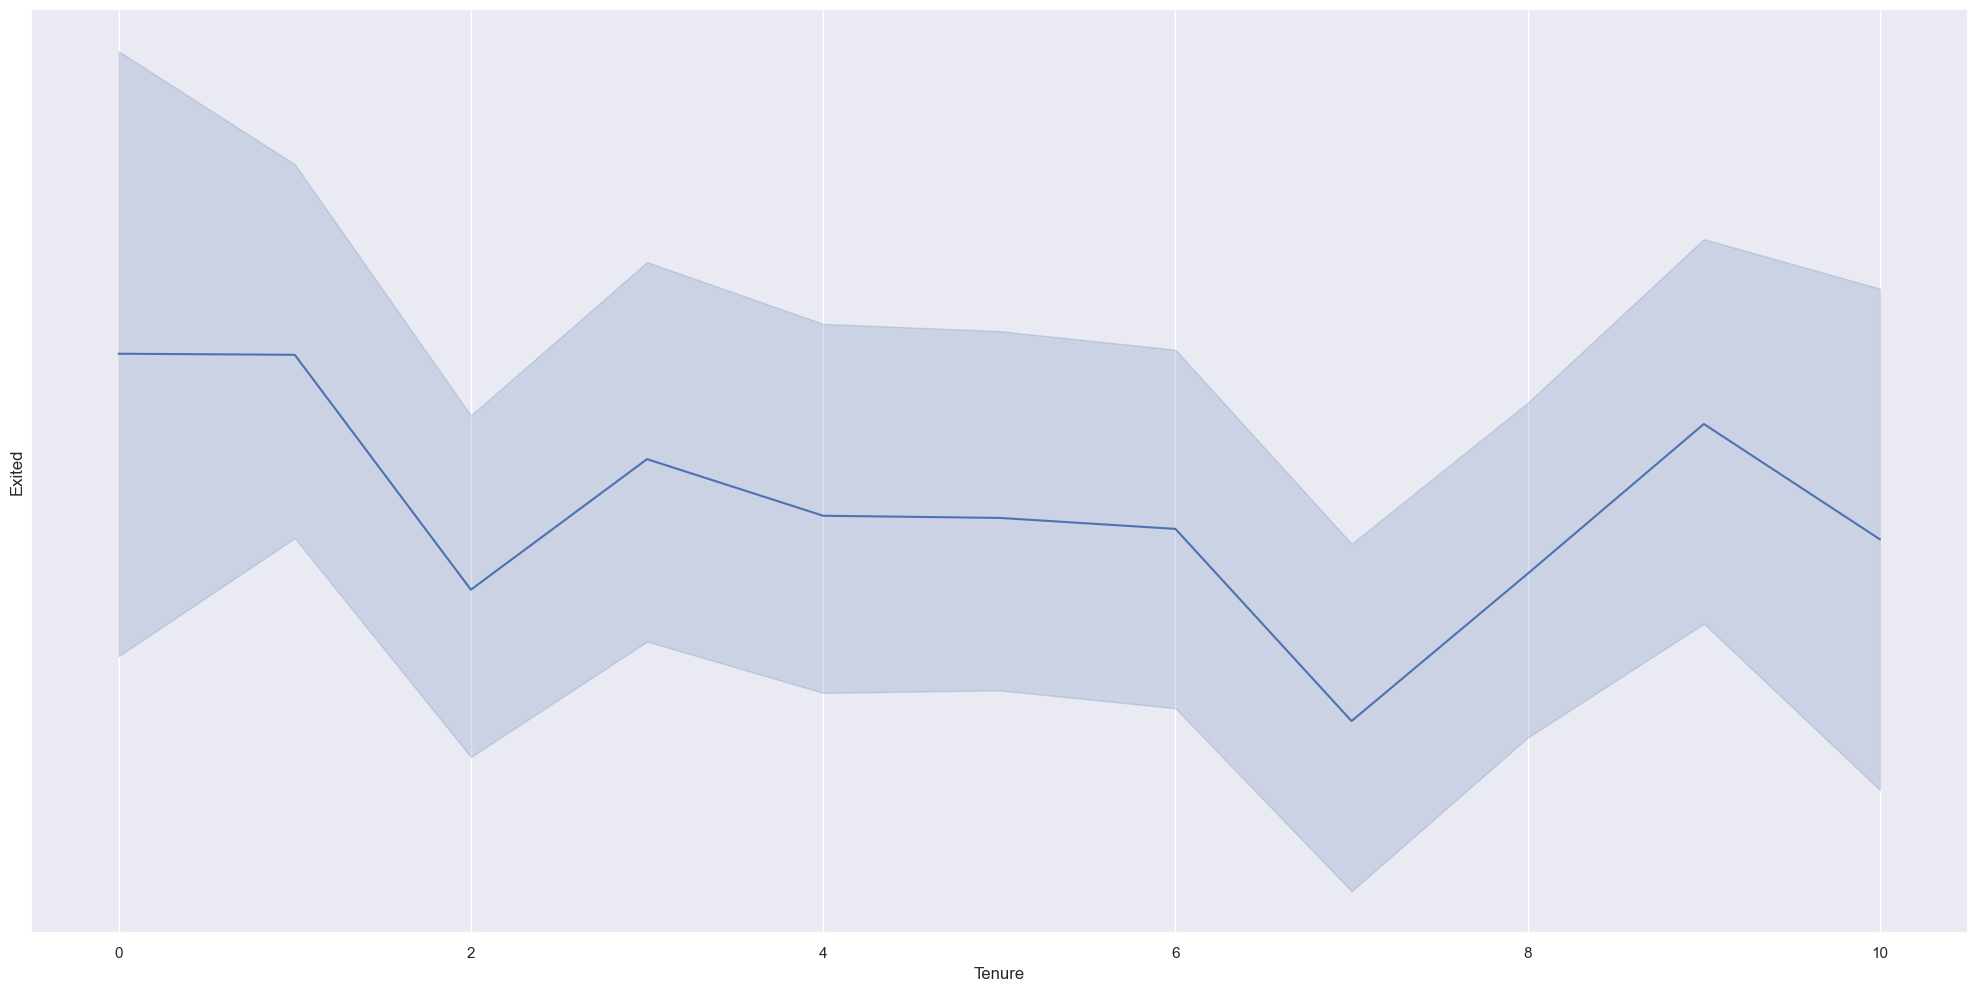

In [44]:
# The number of exited clients peaks in the first and ninth years of their tenure with the bank.

sns.lineplot(x=df4['tenure'],y=df4['exited'], data=df4)
plt.xlabel('Tenure')
plt.ylabel('Exited')

# Display the plot
plt.show('png')

**Observations:**

- The number of clients who exit the bank is higher in the first and ninth years of their banking relationship.

In [45]:
df4.head()

row_number  customer_id  credit_score geography  gender  age  tenure    balance  num_of_products has_cr_card is_active_member  estimated_salary exited age_group has_cr_card_active_member tenure_has_cr_card tenure_is_active_member
0           1     15634602           619    France  Female   42       2       0.00                1         yes              yes         101348.88    yes     adult                       yes                yes                     yes
1           2     15647311           608     Spain  Female   41       1   83807.86                1          no              yes         112542.58     no     adult        only active member        only tenure                     yes
2           3     15619304           502    France  Female   42       8  159660.80                3         yes               no         113931.57    yes     adult          only credit card                yes             only tenure
3           4     15701354           699    France  Female   39       1       0.00                2          no               no          93826.63     no     adult                        no        only tenure             only tenure
4           5     15737888           850     Spain  Female   43       2  125510.82                1         yes              yes          79084.10     no     adult                       yes                yes                     yes

## Numerical Variable

In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9689 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   row_number                 9689 non-null   int64  
 1   customer_id                9689 non-null   int64  
 2   credit_score               9689 non-null   int64  
 3   geography                  9689 non-null   object 
 4   gender                     9689 non-null   object 
 5   age                        9689 non-null   int64  
 6   tenure                     9689 non-null   int64  
 7   balance                    9689 non-null   float64
 8   num_of_products            9689 non-null   int64  
 9   has_cr_card                9689 non-null   object 
 10  is_active_member           9689 non-null   object 
 11  estimated_salary           9689 non-null   float64
 12  exited                     9689 non-null   object 
 13  age_group                  9689 non-null   objec

In [47]:
# Select dataset to int and float
num_variable = df4.select_dtypes(exclude=['object'])

# Check dataset without categorical variables
num_variable.head()

row_number  customer_id  credit_score  age  tenure    balance  num_of_products  estimated_salary
0           1     15634602           619   42       2       0.00                1         101348.88
1           2     15647311           608   41       1   83807.86                1         112542.58
2           3     15619304           502   42       8  159660.80                3         113931.57
3           4     15701354           699   39       1       0.00                2          93826.63
4           5     15737888           850   43       2  125510.82                1          79084.10

In [48]:
# Drop (row_number and customer_id both has no impact on their decision to leave the bank.)

num_variable = num_variable.drop(['row_number','customer_id'], axis=1)

# Check dataset without row_number and customer_id
num_variable.head()

credit_score  age  tenure    balance  num_of_products  estimated_salary
0           619   42       2       0.00                1         101348.88
1           608   41       1   83807.86                1         112542.58
2           502   42       8  159660.80                3         113931.57
3           699   39       1       0.00                2          93826.63
4           850   43       2  125510.82                1          79084.10

array([[<AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'num_of_products'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>]], dtype=object)

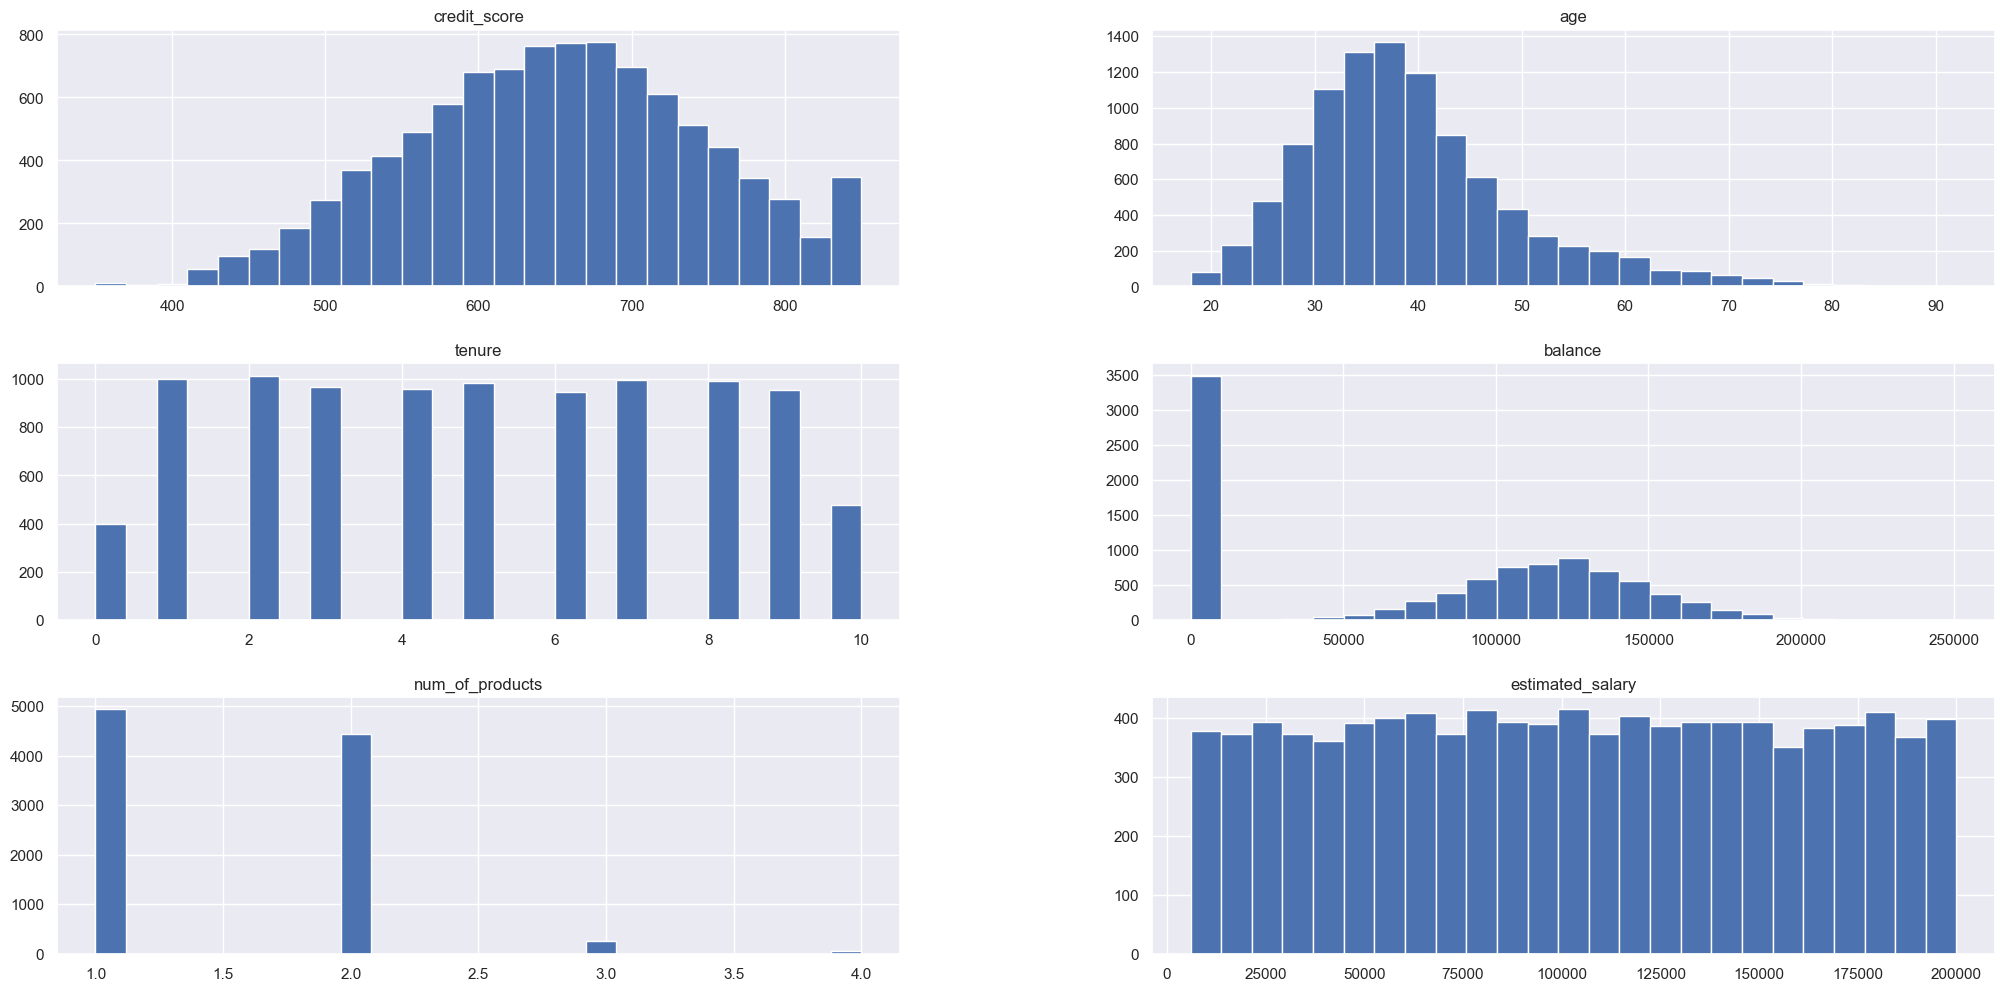

In [49]:
num_variable.hist(bins=25)

**Observations:**
    
- Comparing how the variables are with a normal distribution. 

- Credit score distribution is similar a normal distribution.
- Age distribution shows positive skew and customers are aged between 30 and 40 years.
- There is apparently a balance between the number of months that customers are active.
- Most customers have between 1 and 2 banking products.
- There is a balance between the number of customers and their own salaries.

## Categorical Variable

In [50]:
# Select dataset to int and float
cat_variable = df4.select_dtypes(include=['object'])

# Check dataset with categorical variables
cat_variable.head()

geography  gender has_cr_card is_active_member exited age_group has_cr_card_active_member tenure_has_cr_card tenure_is_active_member
0    France  Female         yes              yes    yes     adult                       yes                yes                     yes
1     Spain  Female          no              yes     no     adult        only active member        only tenure                     yes
2    France  Female         yes               no    yes     adult          only credit card                yes             only tenure
3    France  Female          no               no     no     adult                        no        only tenure             only tenure
4     Spain  Female         yes              yes     no     adult                       yes                yes                     yes

In [51]:
# Numerical value to each categorical variable
def calvalue_counts(cat_variable):

    return cat_variable.value_counts()

In [52]:
calvalue_counts(cat_variable['geography'])

France     4851
Germany    2431
Spain      2407
Name: geography, dtype: int64

In [53]:
calvalue_counts(cat_variable['gender'])

Male      5295
Female    4394
Name: gender, dtype: int64

In [54]:
calvalue_counts(cat_variable['has_cr_card'])

yes    6846
no     2843
Name: has_cr_card, dtype: int64

In [55]:
calvalue_counts(cat_variable['is_active_member'])

yes    4994
no     4695
Name: is_active_member, dtype: int64

In [56]:
calvalue_counts(cat_variable['exited'])

no     7714
yes    1975
Name: exited, dtype: int64

In [57]:
calvalue_counts(cat_variable['age_group'])

adult    9129
old       515
young      45
Name: age_group, dtype: int64

In [58]:
calvalue_counts(cat_variable['has_cr_card_active_member'])

yes                   3507
only credit card      3339
only active member    1487
no                    1356
Name: has_cr_card_active_member, dtype: int64

In [59]:
calvalue_counts(cat_variable['tenure_has_cr_card'])

yes                 6590
only tenure         2702
only credit card     397
Name: tenure_has_cr_card, dtype: int64

In [60]:
calvalue_counts(cat_variable['tenure_has_cr_card'])

yes                 6590
only tenure         2702
only credit card     397
Name: tenure_has_cr_card, dtype: int64

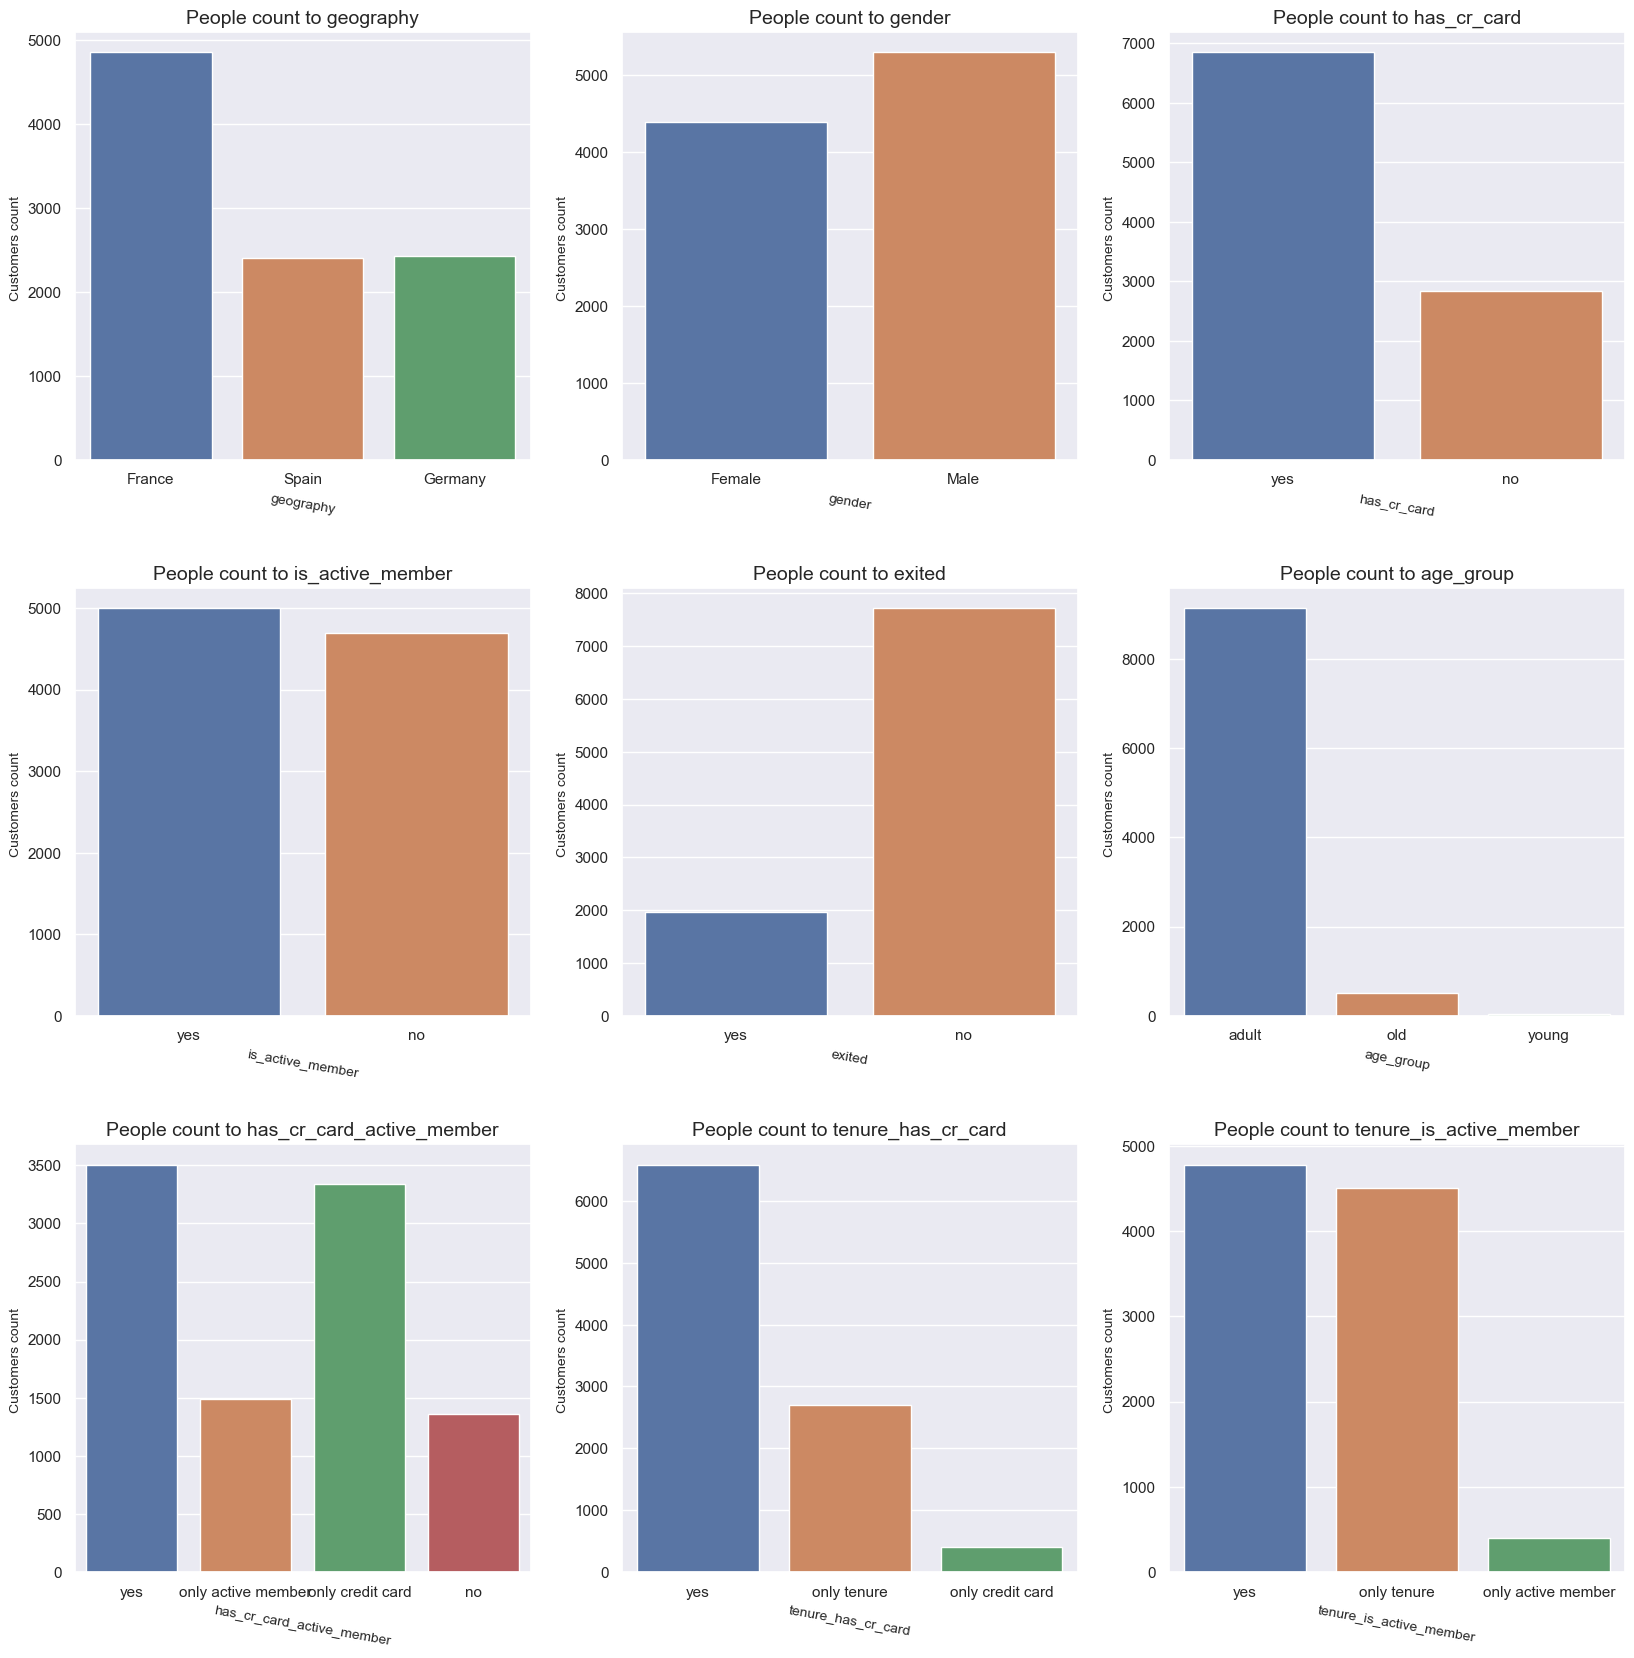

In [61]:
# sets plot size
plt.figure(figsize=(20,20))

# sets the initial plot position
n = 1

# Iterates over the columns to plot
for column in cat_variable.columns:
    plt.subplot(3,3,n)
    _ = sns.countplot(x=cat_variable[column])
    # Title and legends
    plt.title("People count to " + column, fontsize=14)
    plt.xlabel(column, fontsize=10, rotation=-10)
    plt.ylabel("Customers count ", fontsize=10)
    n += 1
    
# Adjust height reserved for space between subplots  
plt.subplots_adjust(hspace=0.3)

# Display the plot
plt.show('png')

**Observations:**
    
- The number of customers in France is almost double that of Germany and Spain.
- The number of male customers exceeds the number of female customers.
- There are more customers with credit cards than customers without credit cards in the bank.
- There is a balance between customers engaged in bank transactions and those without any bank activities transactions.
- The bank primarily serves a larger adult customers than old customers clientele.
- The bank has customers with both credit cards and bank transactions, as well as customers with only credit cards.
- The majority of customers are active and possess credit cards.
- The active customers are evenly split between those with banking transactions and those without.

## Bivariate Analysis

### H1. Male customers are more likely to leave the bank than females?
>**FALSE: Female customers have a higher risk of leaving the bank.**

In [62]:
exited_female = df4[df4['gender'] =='Female']
exited_male   = df4[df4['gender']   =='Male']

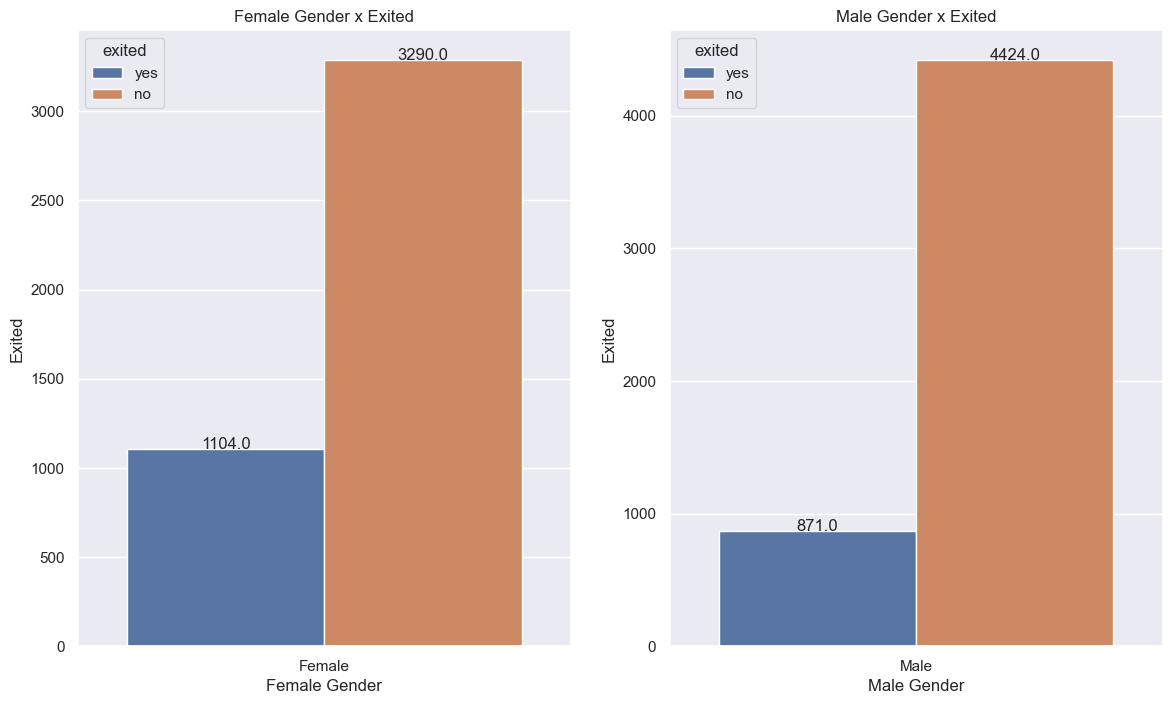

In [63]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Female Count Plot
plt.subplot(1,2,1)
gr = sns.countplot(x = 'gender', hue= 'exited', data=exited_female)

# Title and legends
plt.title('Female Gender x Exited')
plt.xlabel('Female Gender')
plt.ylabel('Exited')

# data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


# Male Count Plot
plt.subplot(1,2,2)
gr = sns.countplot(x = 'gender', hue= 'exited', data=exited_male)

# Title and legends
plt.title('Male Gender x Exited')
plt.xlabel('Male Gender')
plt.ylabel('Exited')

# data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
# Display the plot
plt.show('png')

### H2. Churn is associated with high-salary clients.
>**TRUE: Churn occurs among high-salary clients.**

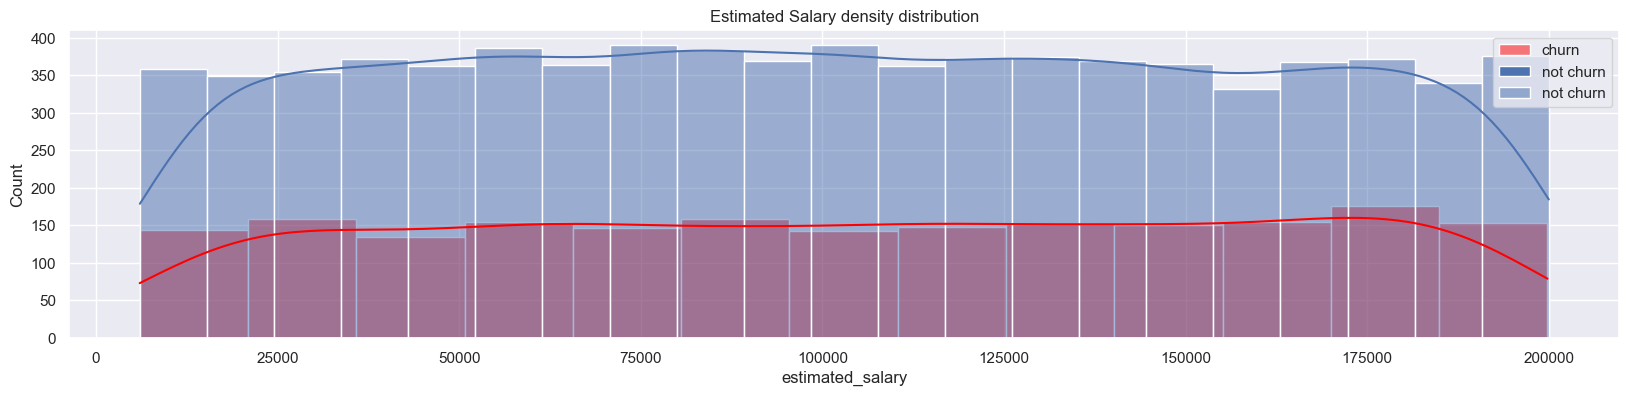

In [64]:
# Auxiliary dataframes
aux1 = df4[df4['exited'] == 'no']
aux2 = df4[df4['exited'] == 'yes']


# plot estimated salary density distribution for exited = 0 and exited = 1
plt.figure(figsize=(20,4))
sns.histplot(aux2['estimated_salary'], color='red', kde=True, label='churn')
sns.histplot(aux1['estimated_salary'], kde=True, label='not churn')
plt.title('Estimated Salary density distribution');
plt.legend();

# Display the plot
plt.show('png')

### H3. German customers are more likely to leave the bank compared to Spanish and French customers.

>**FALSE: French and German customers have the highest likelihood of leaving the bank.**

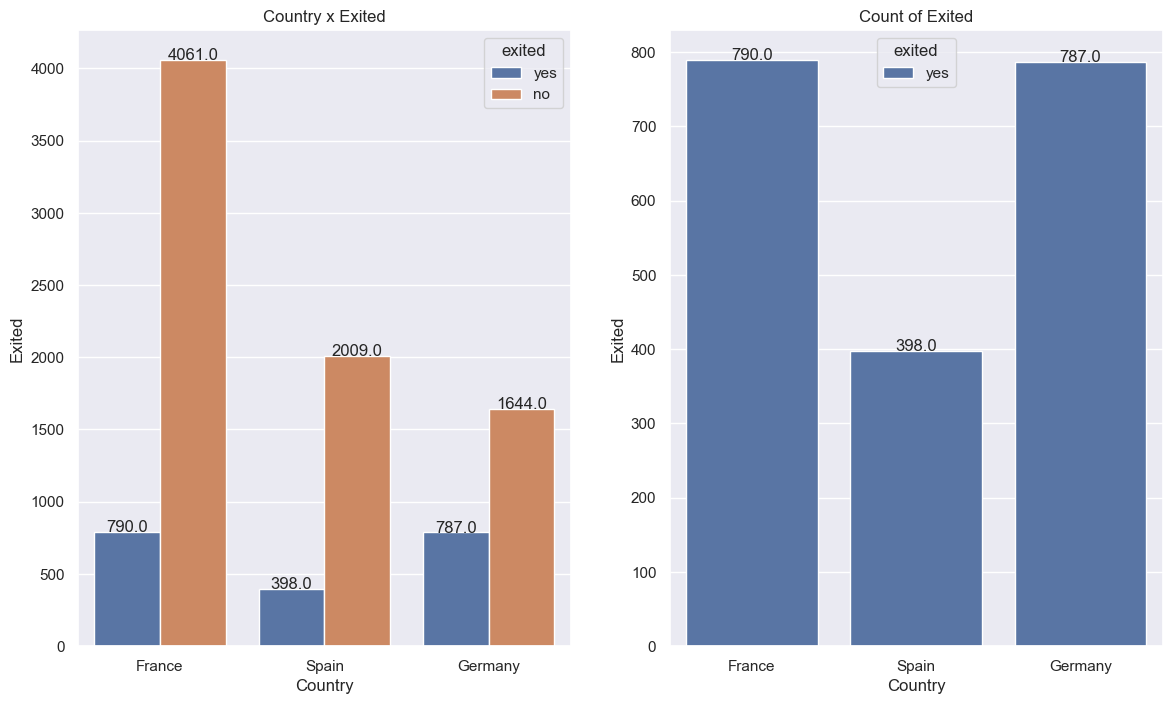

In [65]:
country_exited = df4[['geography', 'exited']]

aux = country_exited[country_exited['exited']=='yes']

fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Female Count Plot
plt.subplot(1,2,1)
gr = sns.countplot(x = 'geography', hue= 'exited', data=country_exited)

# Title and legends
plt.title('Country x Exited')
plt.xlabel('Country')
plt.ylabel('Exited')

# data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Male Count Plot
plt.subplot(1,2,2)
gr = sns.countplot(x = 'geography', hue= 'exited', data=aux)

# Title and legends
plt.title('Count of Exited')
plt.xlabel('Country')
plt.ylabel('Exited')

# data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

**Observation:**

- French and German customers exhibit the highest risk of leaving the bank.

### H4. Older customers are at a higher risk of leaving the bank compared to younger customers.

>**FALSE: Adult customers have a higher risk of leaving the bank.**

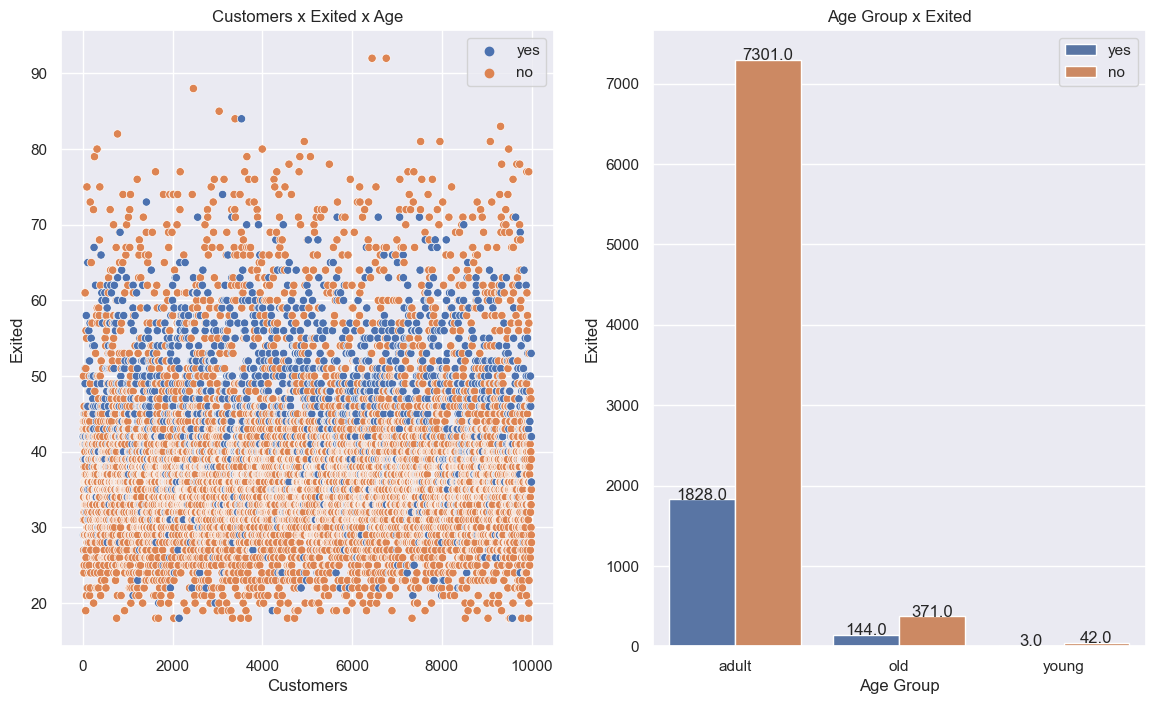

In [66]:
ig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Scatter Plot
plt.subplot(1,2,1)
gr = sns.scatterplot(x = 'row_number', hue='exited', y= 'age', data=df4)

# Title and legends
plt.title('Customers x Exited x Age')
plt.xlabel('Customers')
plt.ylabel('Exited')
plt.legend()

# Count Plot
plt.subplot(1,2,2)
gr = sns.countplot(x = 'age_group', hue= 'exited', data=df4)

# Title and legends
plt.title('Age Group x Exited')
plt.xlabel('Age Group')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
    
# Display the plot
plt.show('png')

**Observation:**
- Men Adult customers have a higher risk of leaving the bank compared to both older and younger customers.

### H5. Customers who remained active for more than 5 months have a lower risk of leaving the bank compared to customers who remained active for less than 5 months.

>**FALSE: There is no difference in the number of customers leaving in relation to the number of months that customers remained active.**

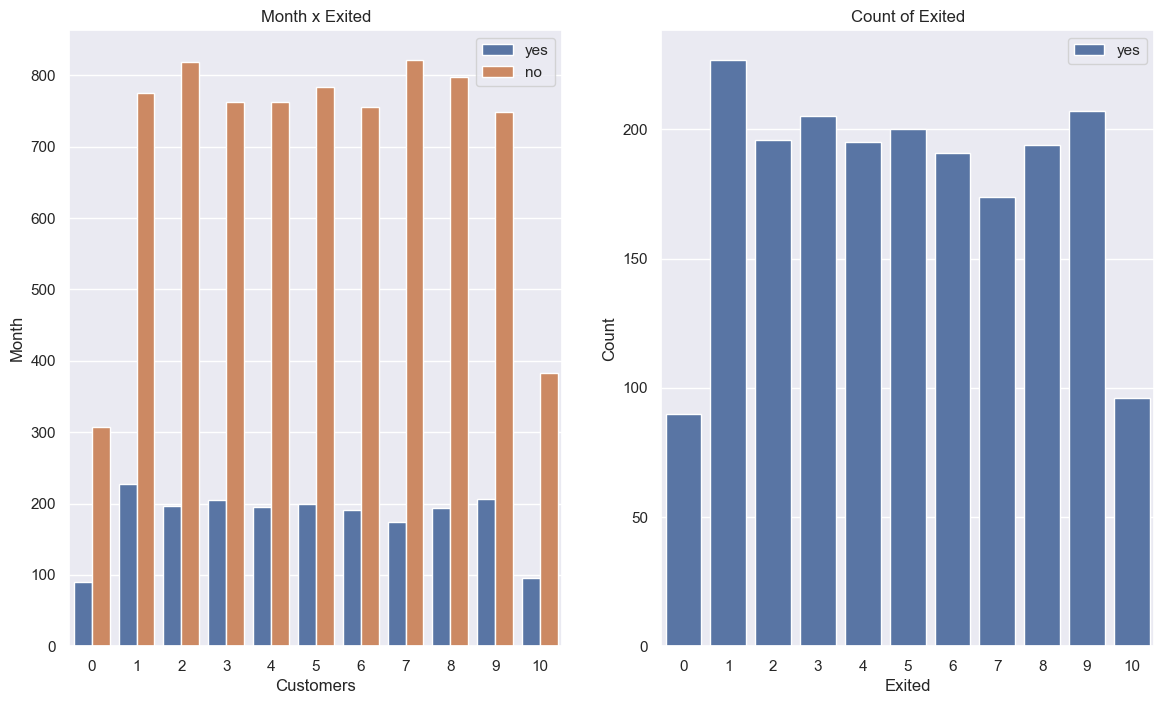

In [67]:
tenure_exited = df4[['tenure', 'exited']]
aux = tenure_exited[tenure_exited['exited'] =='yes']


fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
plt.subplot(1,2,1)
gr = sns.countplot(x = 'tenure', hue= 'exited', data=tenure_exited)

plt.title('Month x Exited')
plt.xlabel('Customers')
plt.ylabel('Month')
plt.legend()

# Data label
#for p in gr.patches:
#    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


# Count Plot
plt.subplot(1,2,2)
gr = sns.countplot(x = 'tenure', hue= 'exited', data=aux)

# Title and legends
plt.title('Count of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.legend()

# Data label
#for p in gr.patches:
#    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

**Observation:**

- There is no significant difference in the number of customers leaving based on the duration of their active period.

### H6. Churn is more likely to occur among clients with a high account balance.

>**TRUE: Churn occurs among clients with a high account balance.** 

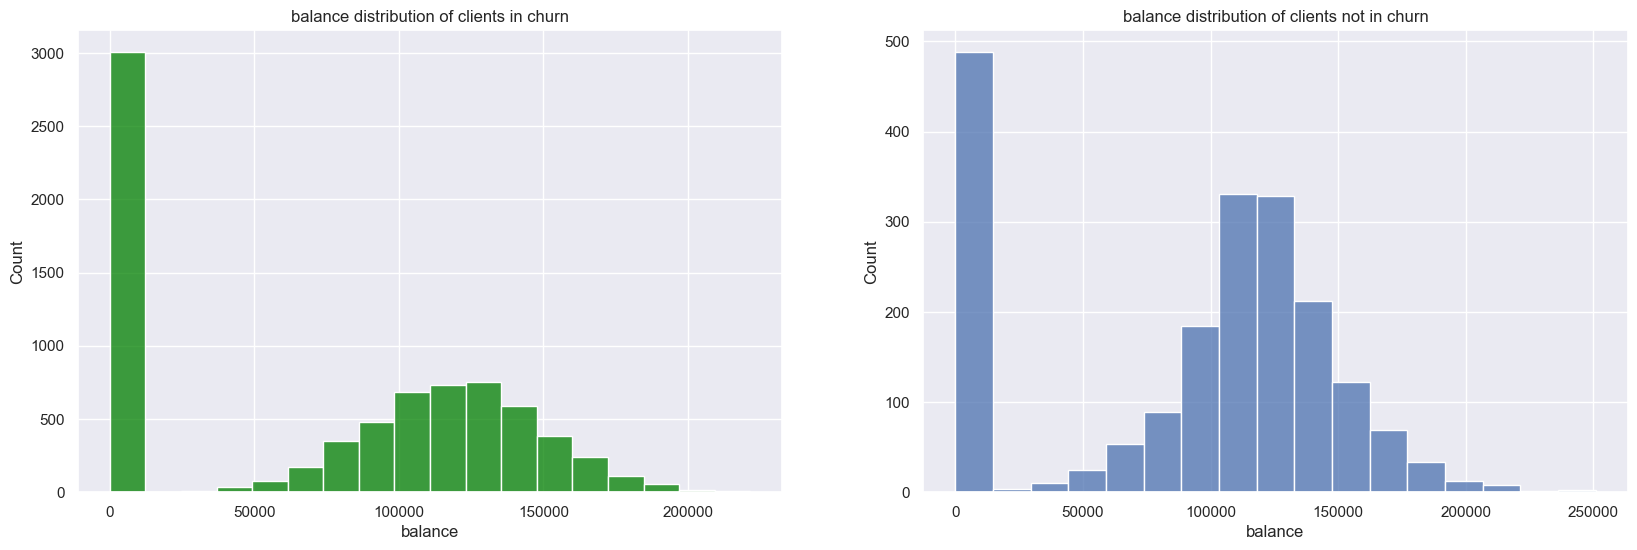

In [68]:
# set dataframes for exited = 0 and exited = 1
aux1 = df4[df4['exited']== 'no']
aux2 = df4[df4['exited']=='yes']

# set up figure size
plt.subplots(figsize=(20,6))

# plot balance distribution of clients in churn
plt.subplot(1,2,1)
sns.histplot(aux1['balance'], color='green').set_title('balance distribution of clients in churn');

# plot balance distribution of clients not in churn
plt.subplot(1,2,2)
sns.histplot(aux2['balance']).set_title('balance distribution of clients not in churn');

# Display the plot
plt.show('png')

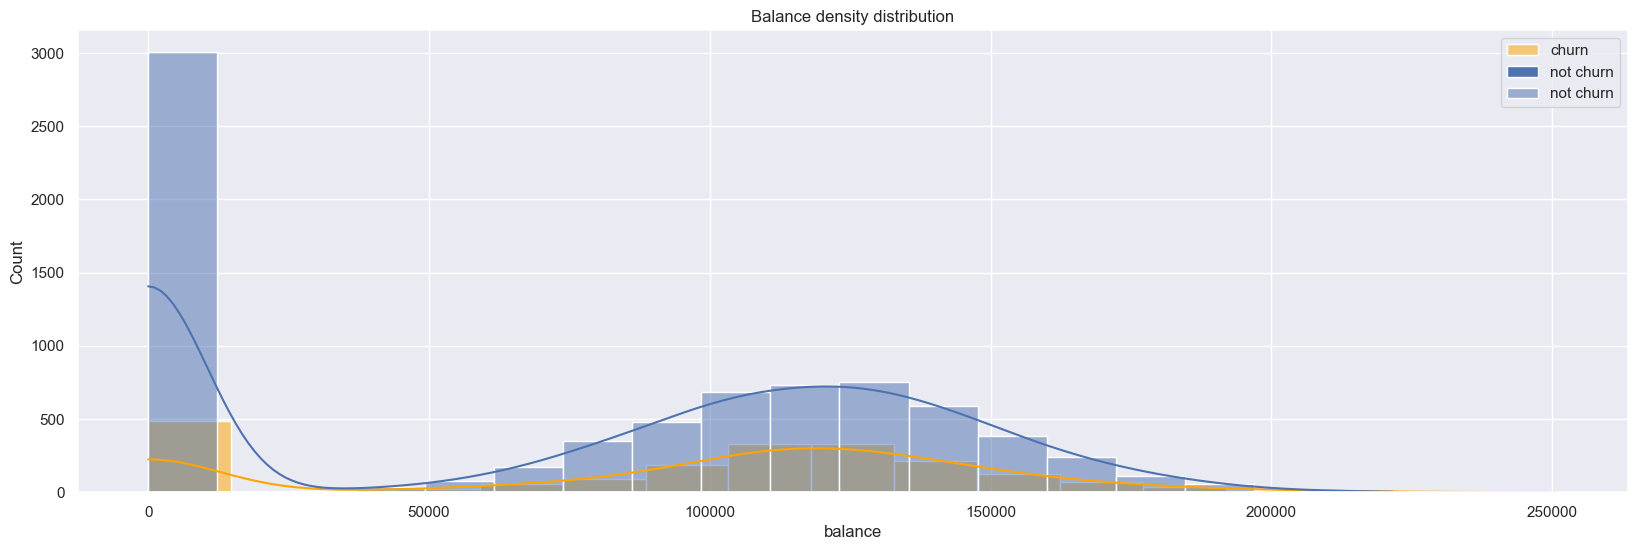

In [69]:
# plot balance density distribution for exited = 0 and exited = 1
plt.subplots(figsize=(20,6))
sns.histplot(aux2['balance'], color='orange', label='churn', kde=True)
sns.histplot(aux1['balance'], label='not churn', kde=True);
plt.legend()
plt.title('Balance density distribution');

# Display the plot
plt.show('png')

### H7. Customers who have more than 2 banking products have a lower risk of leaving the bank compared to customers who have less than 2 banking products.

> **TRUE: Customers who have more than 2 banking products have a lower risk of leaving the bank.**

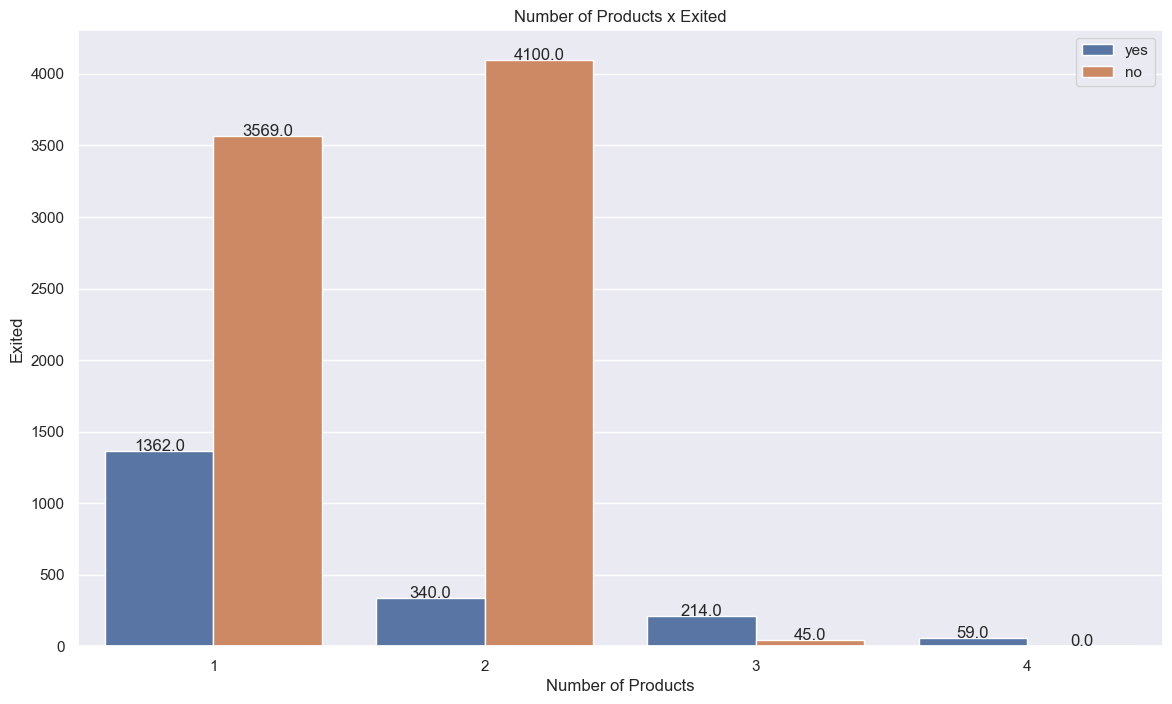

In [70]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
gr = sns.countplot(x = 'num_of_products', hue='exited', data=df4)

# Title and legends
plt.title('Number of Products x Exited')
plt.xlabel('Number of Products')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

**Observation:**

- Customers who have more than 2 banking products have a lower risk of leaving the bank compared to customers who have less than 2 banking products.

### H8. Customers with a credit card have a lower exit risk than customers without a credit card.

**FALSE: Customers with a credit card have a higher risk of leaving the bank than customers without a credit card.**

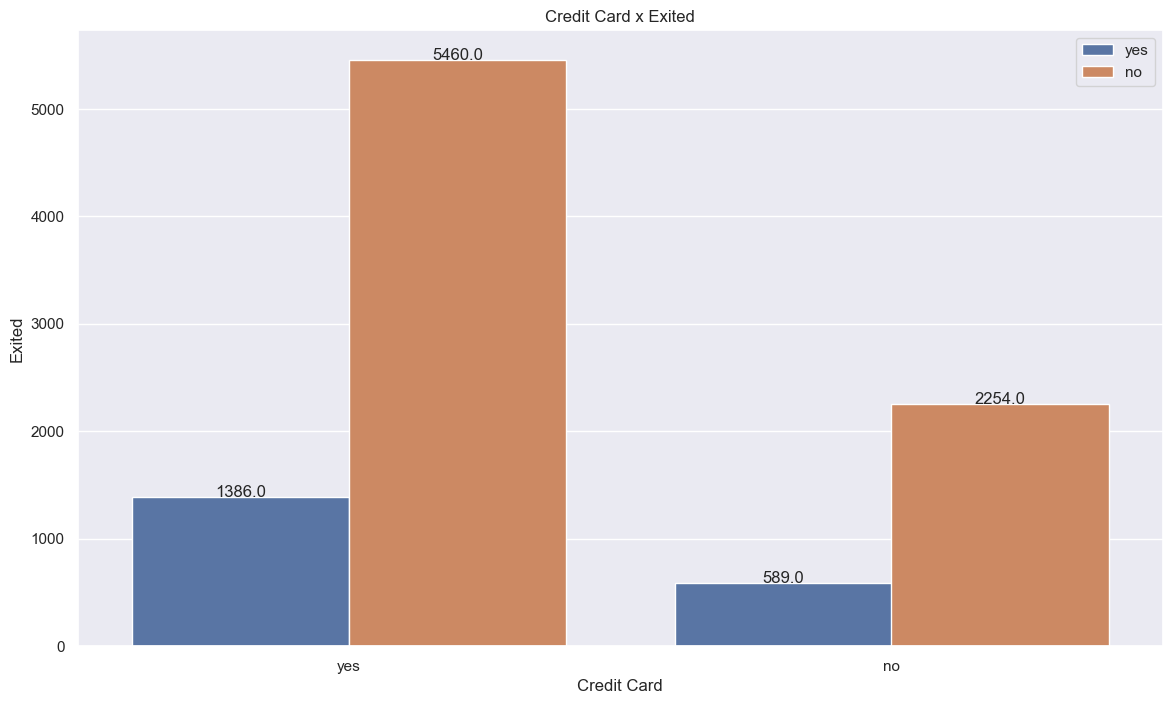

In [71]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
gr = sns.countplot(x = 'has_cr_card', hue='exited', data=df4)


# Title and legends
plt.title('Credit Card x Exited')
plt.xlabel('Credit Card')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')


# Display the plot
plt.show('png')

### H9. Customers with bank transactions have a lower exit risk than customers without bank transactions.

**FALSE: Customers with bank transactions have a higher risk of leaving than customers without bank transactions.**

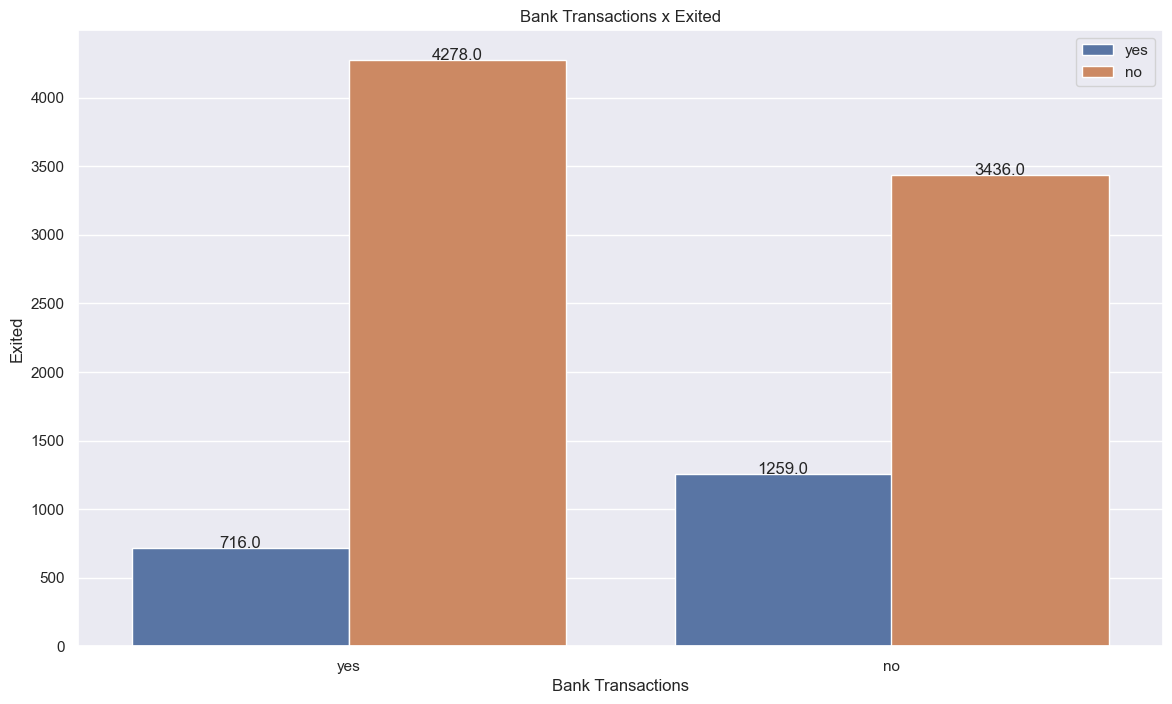

In [72]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
gr = sns.countplot(x = 'is_active_member', hue='exited', data=df4)

# Title and legends
plt.title('Bank Transactions x Exited')
plt.xlabel('Bank Transactions')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

### H10. Customers whose credit exceeds 1000 euros exhibit a lower probability of leaving the bank compared to customers with credit below 650 euros.

>**TRUE: Customers with credit above 1000 euros indeed have a lower risk of leaving the bank.**

In [73]:
# Group customers select exited (credit_score < 1000)

credit_score_less = df4[df4['credit_score'] <= 1000]
credit_score_less['exited'].value_counts(normalize = True)

no     0.796161
yes    0.203839
Name: exited, dtype: float64

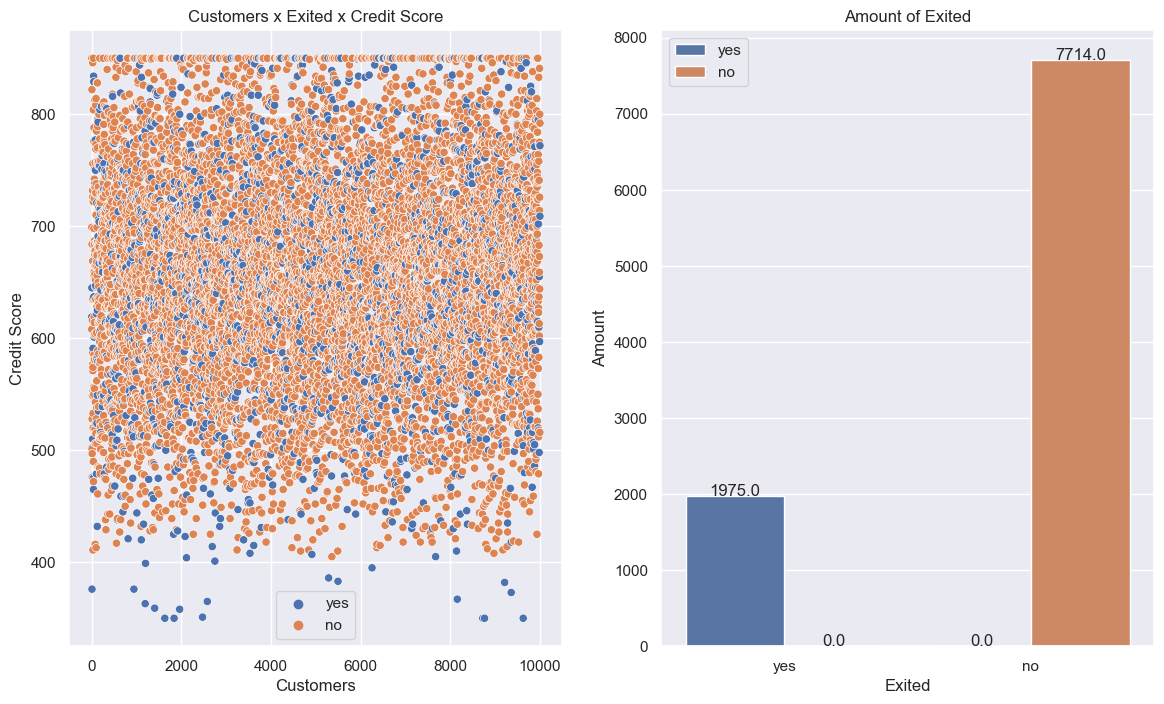

In [74]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
plt.subplot(1,2,1)
gr = sns.scatterplot(x = 'row_number', hue= 'exited', y='credit_score', data=credit_score_less)

# Title and legends
plt.title('Customers x Exited x Credit Score')
plt.xlabel('Customers')
plt.ylabel('Credit Score')
plt.legend()

a = credit_score_less['exited']

# Count Plot
plt.subplot(1,2,2)
gr = sns.countplot(x = a, hue='exited', data=credit_score_less)

# Title and legends
plt.title('Amount of Exited')
plt.xlabel('Exited')
plt.ylabel('Amount')
plt.legend()


# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

**Observation:**

- Approximately 20.0% of customers with credit below 1000 euros have left the bank. "(1975 customers)"

### H11 Customers possessing a credit card exhibit a lower risk of attrition compared to customers without a credit card.
>**FALSE**Contrary to the statement, customers with a credit card do not inherently carry a higher risk of leaving the bank compared to customers without a credit card.

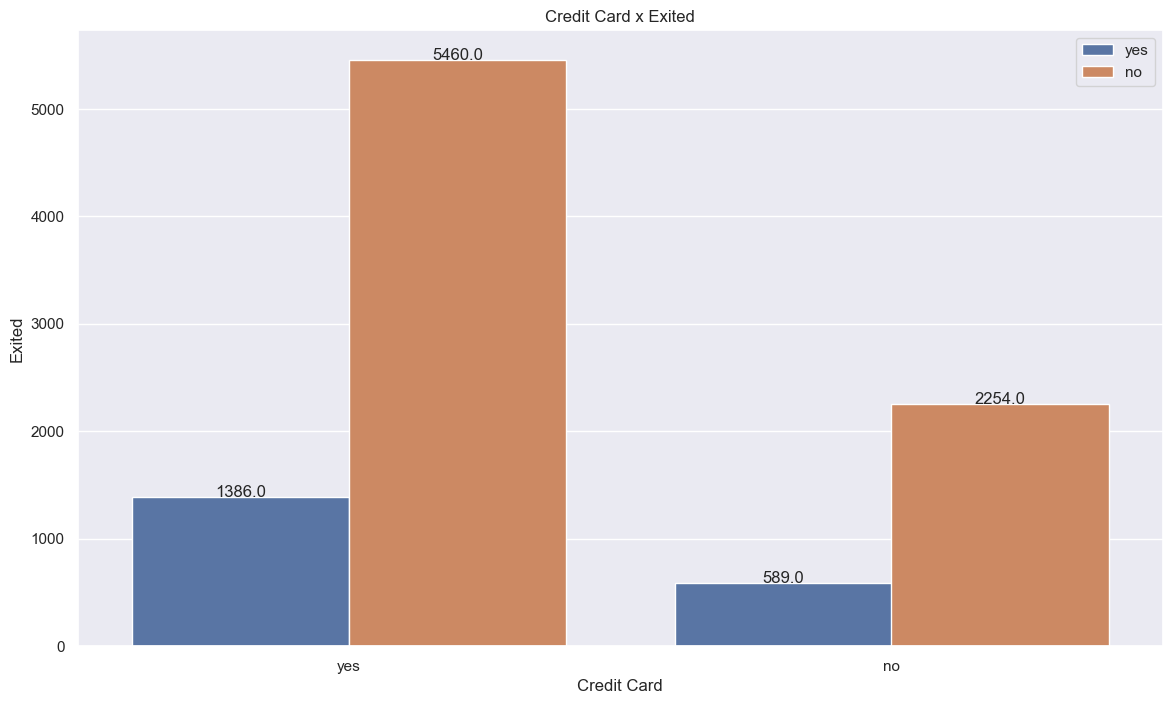

In [75]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
gr = sns.countplot(x = 'has_cr_card', hue='exited', data=df4)

# Title and legends
plt.title('Credit Card x Exited')
plt.xlabel('Credit Card')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

**Observation:**
- Customers with a credit card are more likely to leave the bank compared to customers without a credit card.

### H12. Customers with credit cards and bank transactions exhibit a reduced likelihood of churning from the bank.

>**FALSE: The claim that customers solely engaged in bank transactions have a low risk of leaving the bank is incorrect.**

In [76]:
df4.columns

Index(['row_number', 'customer_id', 'credit_score', 'geography', 'gender',
       'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited', 'age_group',
       'has_cr_card_active_member', 'tenure_has_cr_card',
       'tenure_is_active_member'],
      dtype='object')

In [77]:
aux = df4[['has_cr_card_active_member', 'exited']]

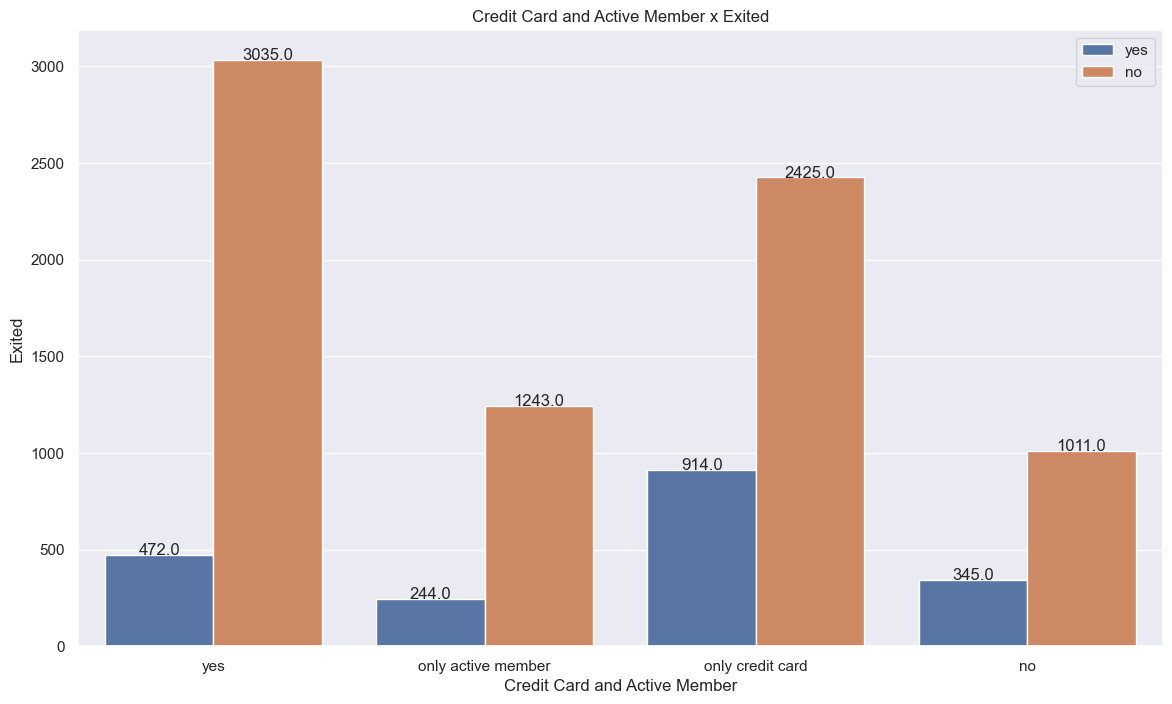

In [78]:
fig, gr = plt.subplots()

# Figure Size
gr.figure.set_size_inches(14,8)

# Count Plot
gr = sns.countplot(x = 'has_cr_card_active_member', hue='exited', data=aux)

# Title and legends
plt.title('Credit Card and Active Member x Exited')
plt.xlabel('Credit Card and Active Member')
plt.ylabel('Exited')
plt.legend()

# Data label
for p in gr.patches:
    gr.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Display the plot
plt.show('png')

## Multivariate Analysis

### Numerical Attributes

/tmp/ipykernel_5805/131877760.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = numeric_attributes.corr( method='pearson' )


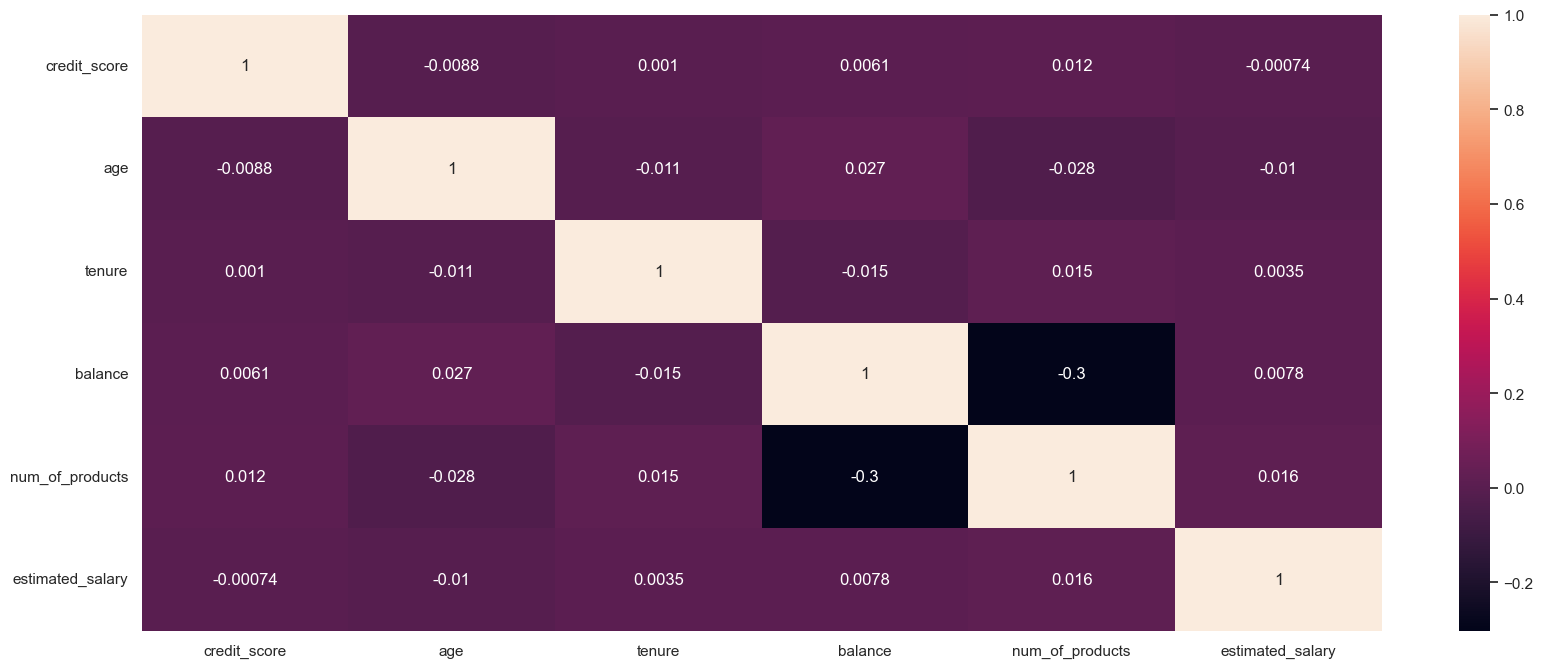

In [84]:
# select numerical attributes
numeric_attributes = df4.select_dtypes(include=['int64','float64'])

# drop variables and row number, customer id
numeric_attributes = df4.drop(['has_cr_card', 'is_active_member', 'exited', 'row_number', 'customer_id'], axis=1)

# correlation by pearosn method
correlation = numeric_attributes.corr( method='pearson' )

# set up figure size
f, ax = plt.subplots( figsize=(20,8))

sns.heatmap( correlation, annot=True );

### Categorical Attributes

In [90]:
c = df4.select_dtypes(include ='object')
c.head()

geography  gender has_cr_card is_active_member exited age_group has_cr_card_active_member tenure_has_cr_card tenure_is_active_member
0    France  Female         yes              yes    yes     adult                       yes                yes                     yes
1     Spain  Female          no              yes     no     adult        only active member        only tenure                     yes
2    France  Female         yes               no    yes     adult          only credit card                yes             only tenure
3    France  Female          no               no     no     adult                        no        only tenure             only tenure
4     Spain  Female         yes              yes     no     adult                       yes                yes                     yes

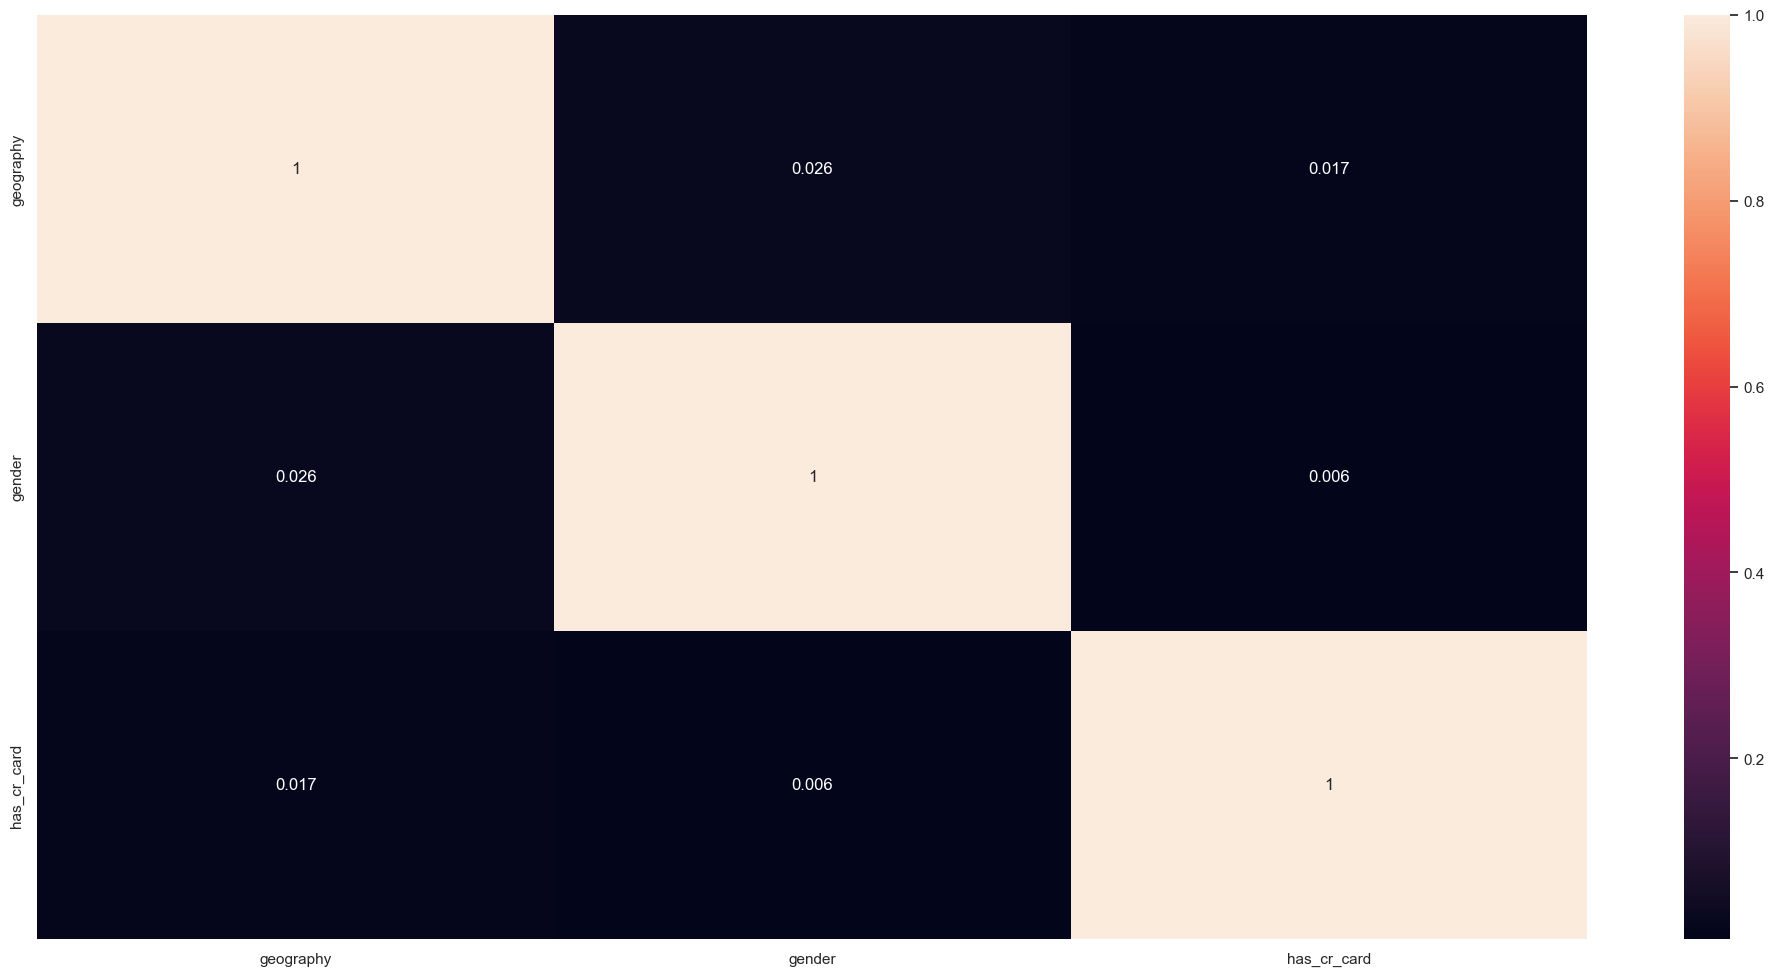

In [135]:
# calculate Cramer V
# Cramer V formula - Helper Functions section.
c1 = cramer_v( c['geography'], c['geography'] )
c2 = cramer_v( c['geography'], c['gender'] )
c3 = cramer_v( c['geography'], c['has_cr_card'] )

c4 = cramer_v( c['gender'], c['geography'] )
c5 = cramer_v( c['gender'], c['gender'] )
c6 = cramer_v( c['gender'], c['has_cr_card'] )

c7 = cramer_v( c['has_cr_card'], c['geography'] )
c8 = cramer_v( c['has_cr_card'], c['gender'] )
c9 = cramer_v( c['has_cr_card'], c['has_cr_card'] )

c7 = cramer_v( c['has_cr_card'], c['geography'] )
c8 = cramer_v( c['has_cr_card'], c['gender'] )
c9 = cramer_v( c['has_cr_card'], c['has_cr_card'] )



# final dataset
d = pd.DataFrame( {'geography': [c1, c2, c3],
                   'gender': [c4, c5, c6],
                  'has_cr_card':[c7, c8, c9]})

d = d.set_index( d.columns )

sns.heatmap( d, annot=True);